In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
import metpy.calc as mpcalc
from metpy.units import units
import pickle

import tools

from analysis_tools import generate_ideal_profiles
from tools.cbook import pickle2Obj

_nthreads = 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
#--------------------------------------------------------------------------------------------
def plot_profile(profile, var, zhgts, percentile, ax, color, mlabel, step=-1, linewidth=2.0, linestyle='solid'):

    label = "%s NOBJ:  %d" % (mlabel, profile[var].shape[1])

    p = profile[var]
        
    if step != -1:
        t0 = profile['tindex'][step[0]]
        t1 = profile['tindex'][step[1]]
        p = p[:,t0:t1]
        
    label = "%s NOBJ:  %d" % (mlabel, p.shape[1])       
    
    ax.plot(p.mean(axis=1), zhgts, color=color, linewidth=linewidth, label=label, linestyle=linestyle)
#--------------------------------------------------------------------------------------------
# define plotting sub

def plot_wprofile_driver(cm1, wrf, fv3, plabel = ""):

    titles = ["0-2 Hour Updraft Profiles", "2-4 Hour Updraft Profiles", "4-6 Hour Updraft Profiles"]

    xvert  = [6.0, 8.0, 12.5]
    xlim   = [10., 15.0, 20.0]

    zhgts = 250. + 250.*np.arange(100)

    allcape = ( "C2000", "C3500")
    
    step = [[0,8],[8,16],[16,24]]

    for cape in allcape:

        label = []

        label.append("%s" % (cape))

        fig, ax = plt.subplots(1,3, constrained_layout=True,figsize=(20,10))
        
        variable = 'pert_t'

        for n, s in enumerate(step):
            
            m = n

            plot_profile(cm1[label[0]], variable, zhgts, m, ax[n], 'b', 'CM1_06', step=s, linewidth=0.5)

            plot_profile(fv3[label[0]], variable, zhgts, m, ax[n], 'r', 'FV3_06', step=s, linewidth=0.5)

            plot_profile(wrf[label[0]], variable, zhgts, m, ax[n], 'k', 'WRF_06', step=s, linewidth=0.5)

            ax[n].set_title("%s" % titles[n], fontsize=18)
            ax[n].axhline(y=6000., color='k', linestyle='-')
            ax[n].axhline(y=8000., color='k', linestyle='-')
            ax[n].axhline(y=10000., color='k', linestyle='-')
            ax[n].axvline(x=0.0, color='k', linestyle='--')
            ax[n].axvline(x=xvert[n], color='k', linestyle='--')

            ax[n].set_ylim(0.0,25000.)
            ax[n].set_xlim(-1.0,xlim[n])
            ax[n].legend(fontsize=14, loc='upper right')

        plt.suptitle("%s  CAPE = %s" % (plabel, cape[1:]), fontsize=24)
        plt.show()
        
#--------------------------------------------------------------------------------------------
# define w / t / theta plotting

def plot_wptpth_driver(cm1, wrf, fv3, plabel = ""):

    titles = ["0-2 Hour Updraft Profiles", "0-2 Hour Pert. Temp Profiles", "0-2 Hour Pert. Pressure (Pa) Profiles"]

    xvert  = [6.0, 8.0, 12.5]
    xlim   = [15., 15.0, 20.0]

    zhgts = 250. + 250.*np.arange(100)

    allcape = ( "C2000", "C3500" )
    
    s = [0,25]
    m = 0

    for cape in allcape:

        fig, ax = plt.subplots(1,3, constrained_layout=True,figsize=(20,10))
        
        for n, variable in enumerate(['w', 'pert_t', 'pert_p']):
                        
            plot_profile(cm1[cape], variable, zhgts, m, ax[n], 'b', 'CM1_06', step=-1, linewidth=1.0)

            plot_profile(wrf[cape], variable, zhgts, m, ax[n], 'k', 'WRF_06', step=-1, linewidth=1.0)
            
            if variable == 'pert_p':
                variable = 'pert_pss'
                
            plot_profile(fv3[cape], variable, zhgts, m, ax[n], 'r', 'FV3_06', step=-1, linewidth=1.0)

            ax[n].set_title("%s" % titles[n], fontsize=18)
                                      
            ax[n].axhline(y=6000., color='k', linestyle='-')
            ax[n].axhline(y=8000., color='k', linestyle='-')
            ax[n].axhline(y=10000., color='k', linestyle='-')
            ax[n].axhline(y=12000., color='k', linestyle='-')

            ax[n].set_ylim(0.0,25000.) 
                                       
            if n == 0:
                ax[n].axvline(x=0.0, color='k', linestyle='--')
                ax[n].axvline(x=xvert[n], color='k', linestyle='--')
                ax[n].set_xlim(-5.0,xlim[n])
                ax[n].legend(fontsize=14, loc='upper right')
            elif n == 1:
                ax[n].legend(fontsize=14, loc='upper left')
                ax[n].axvline(x=0.0, color='k', linestyle='--')
                ax[n].set_xlim(-10.0,15.0)
            else:
                ax[n].legend(fontsize=14, loc='upper left')
                ax[n].axvline(x=0.0, color='k', linestyle='--')
                ax[n].set_xlim(-400.0,400.0)

        plt.suptitle("%s  CAPE = %s" % (plabel, cape[1:]), fontsize=24)
        plt.show()

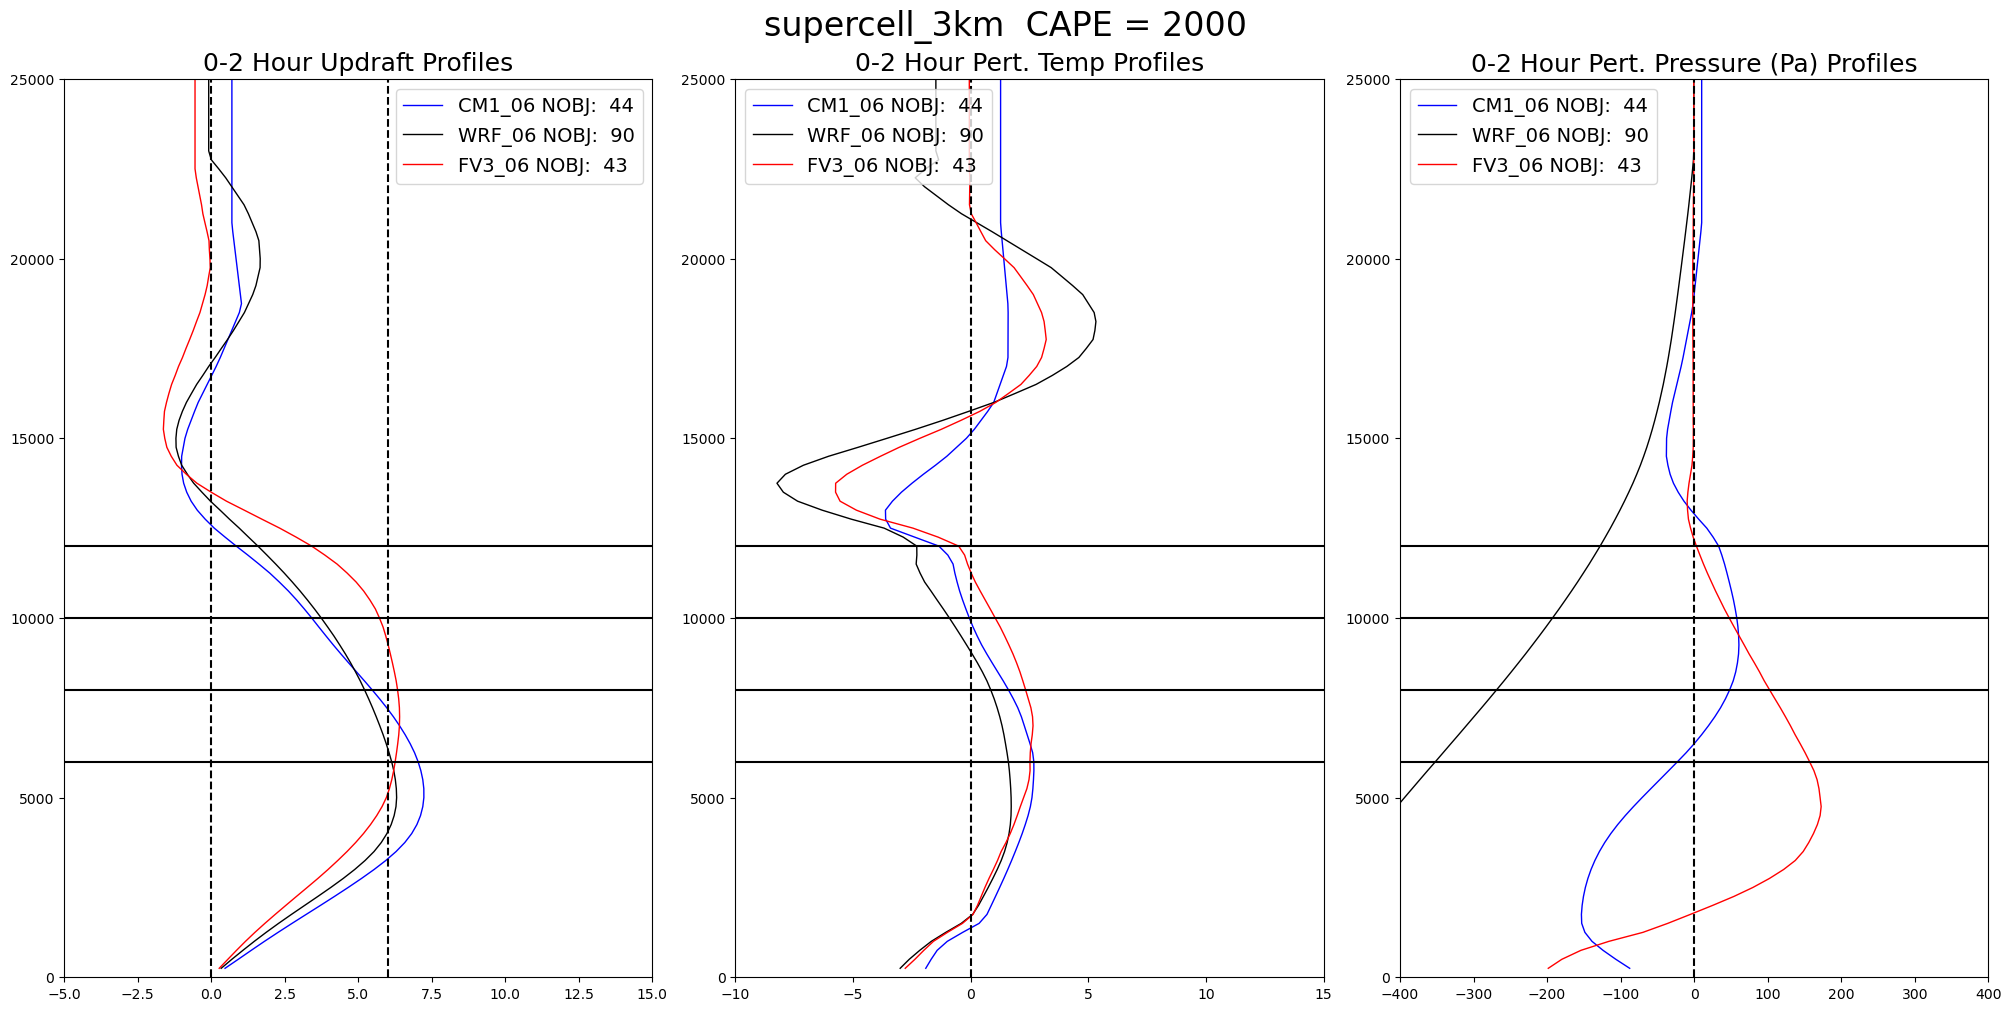

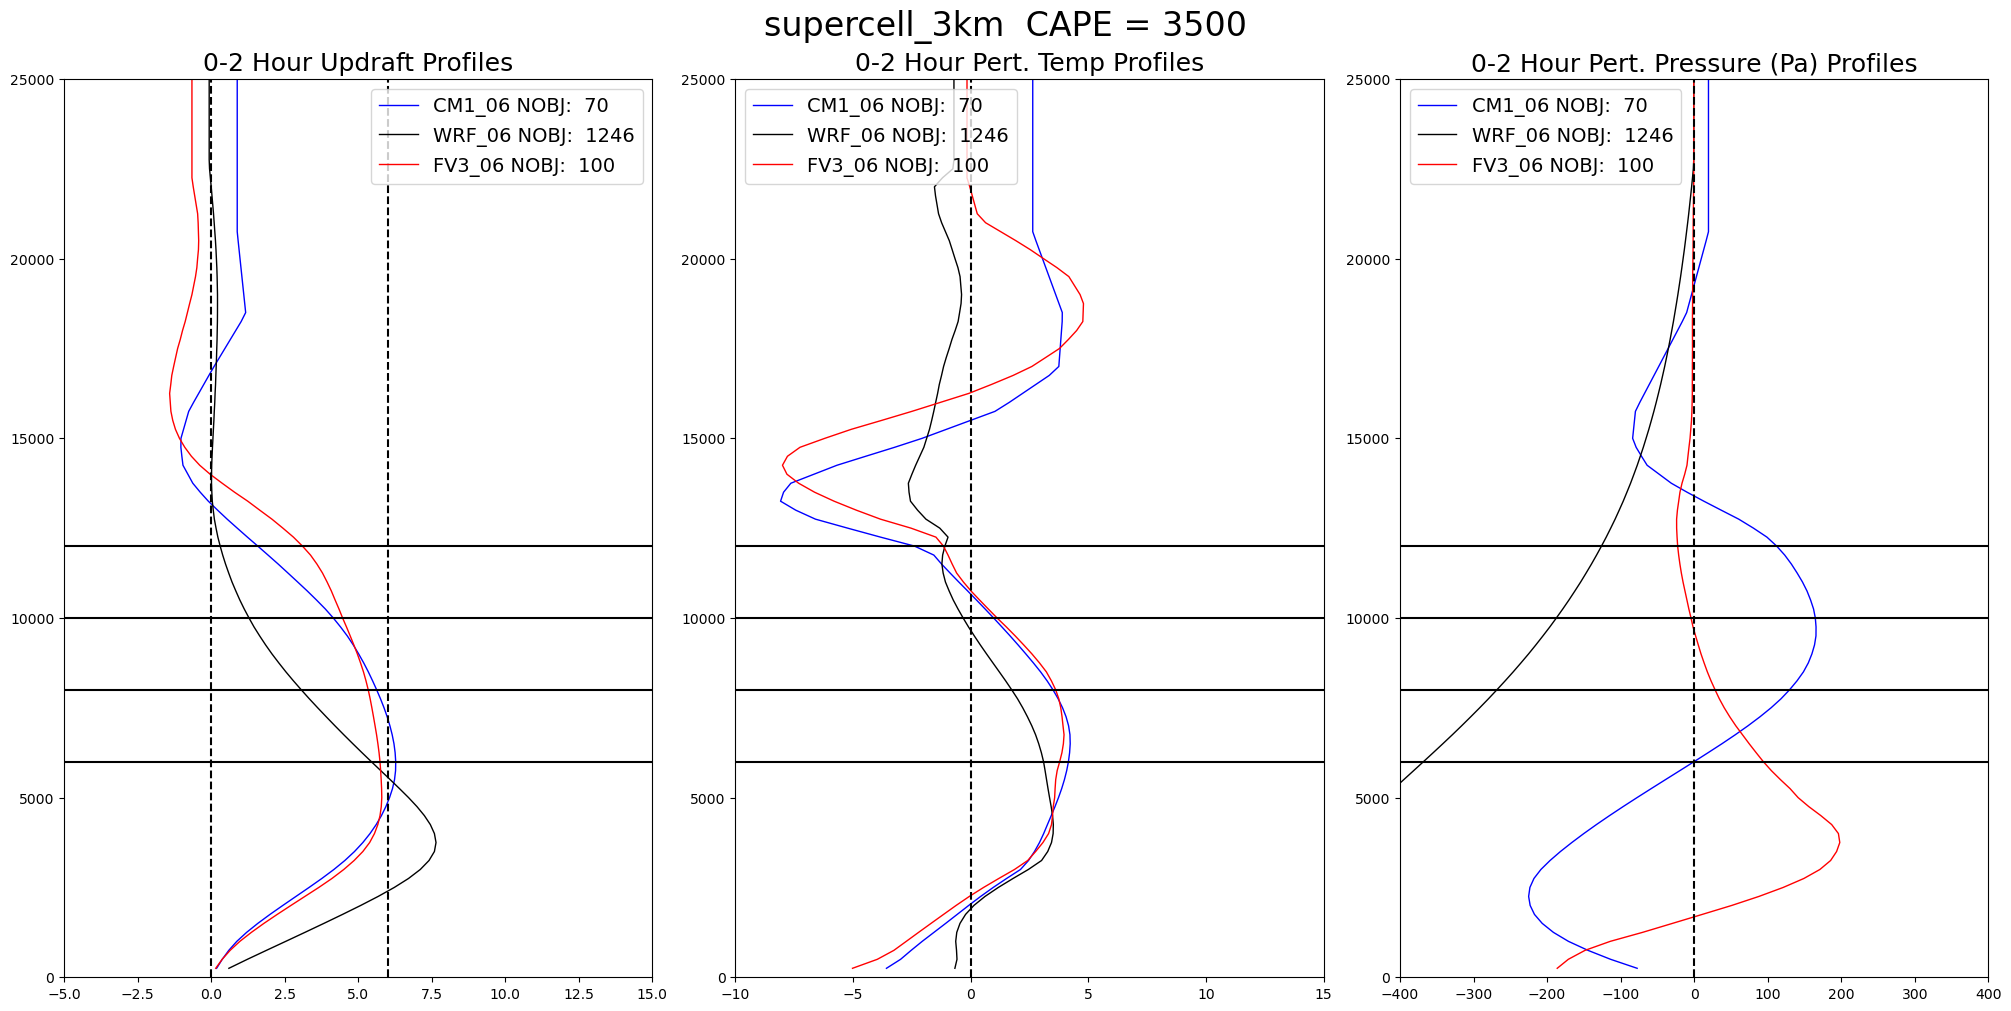

In [57]:
# Just read stuff back in...
            
plot_wptpth_driver( pickle2Obj('cm1_supercell_3km_profiles.pkl', retObj=False), 
                    pickle2Obj('wrf_supercell_3km_profiles.pkl', retObj=False),
                    pickle2Obj('solo_supercell_3km_profiles.pkl',retObj=False), plabel = 'supercell_3km' )

# # Just read stuff back in...
            
# plot_wprofile_driver( pickle2Obj('cm1_squall_noload_profiles.pkl',retObj=False), 
#                       pickle2Obj('wrf_squall_noload_profiles.pkl',retObj=False),
#                       pickle2Obj('solo_squall_3km_profiles.pkl',retObj=False), plabel = 'squall_NoLoad' )

In [4]:
#----------------------------------------------------
def plot_sizes_driver(cm1, wrf, solo, plabel=""):
    
    titles = ["0-2 Hour Updraft Sizes", "2-4 Hour Updraft Sizes", "4-6 Hour Updraft Sizes"]

    allcape = ("C2000", )
    
    step = [[0,8],[8,16],[16,24]]

    for cape in allcape:

        label = "%s" % (cape)

        fig, ax = plt.subplots(1,3, constrained_layout=True,figsize=(20,10))

        for n, s in enumerate(step):

            t0 = solo[label]['tindex'][s[0]]
            t1 = solo[label]['tindex'][s[1]]
            ss = np.sort(solo[label]['size'][t0:t1])

            t0 = wrf[label]['tindex'][s[0]]
            t1 = wrf[label]['tindex'][s[1]]
            ww = np.sort(wrf[label]['size'][t0:t1])

            t0 = cm1[label]['tindex'][s[0]]
            t1 = cm1[label]['tindex'][s[1]]
            cc = np.sort(cm1[label]['size'][t0:t1])               

            zsolo = np.arange(len(ss))/float(len(ss))

            zwrf = np.arange(len(ww))/float(len(ww))

            zcm1 = np.arange(len(cc))/float(len(cc))

            ax[n].plot(ss, zsolo, color='r', label='FV3_SOLO')
            ax[n].plot(ww, zwrf, color='k', label='WRF')

            ax[n].plot(cc, zcm1, color='b', label='CM1')

            ax[n].set_title("%s - (Updraft Size in Pixels)" % (titles[n]), fontsize=14)
            ax[n].axhline(y=0.5, color='k', linestyle='--')
            ax[n].axhline(y=0.9,  color='k', linestyle='--')

            ax[n].set_ylim(0.0,1.1)
            ax[n].set_xlim(0,50)
            ax[n].legend(fontsize=14, loc='lower right')

        plt.suptitle("%s" % (label), fontsize=18)


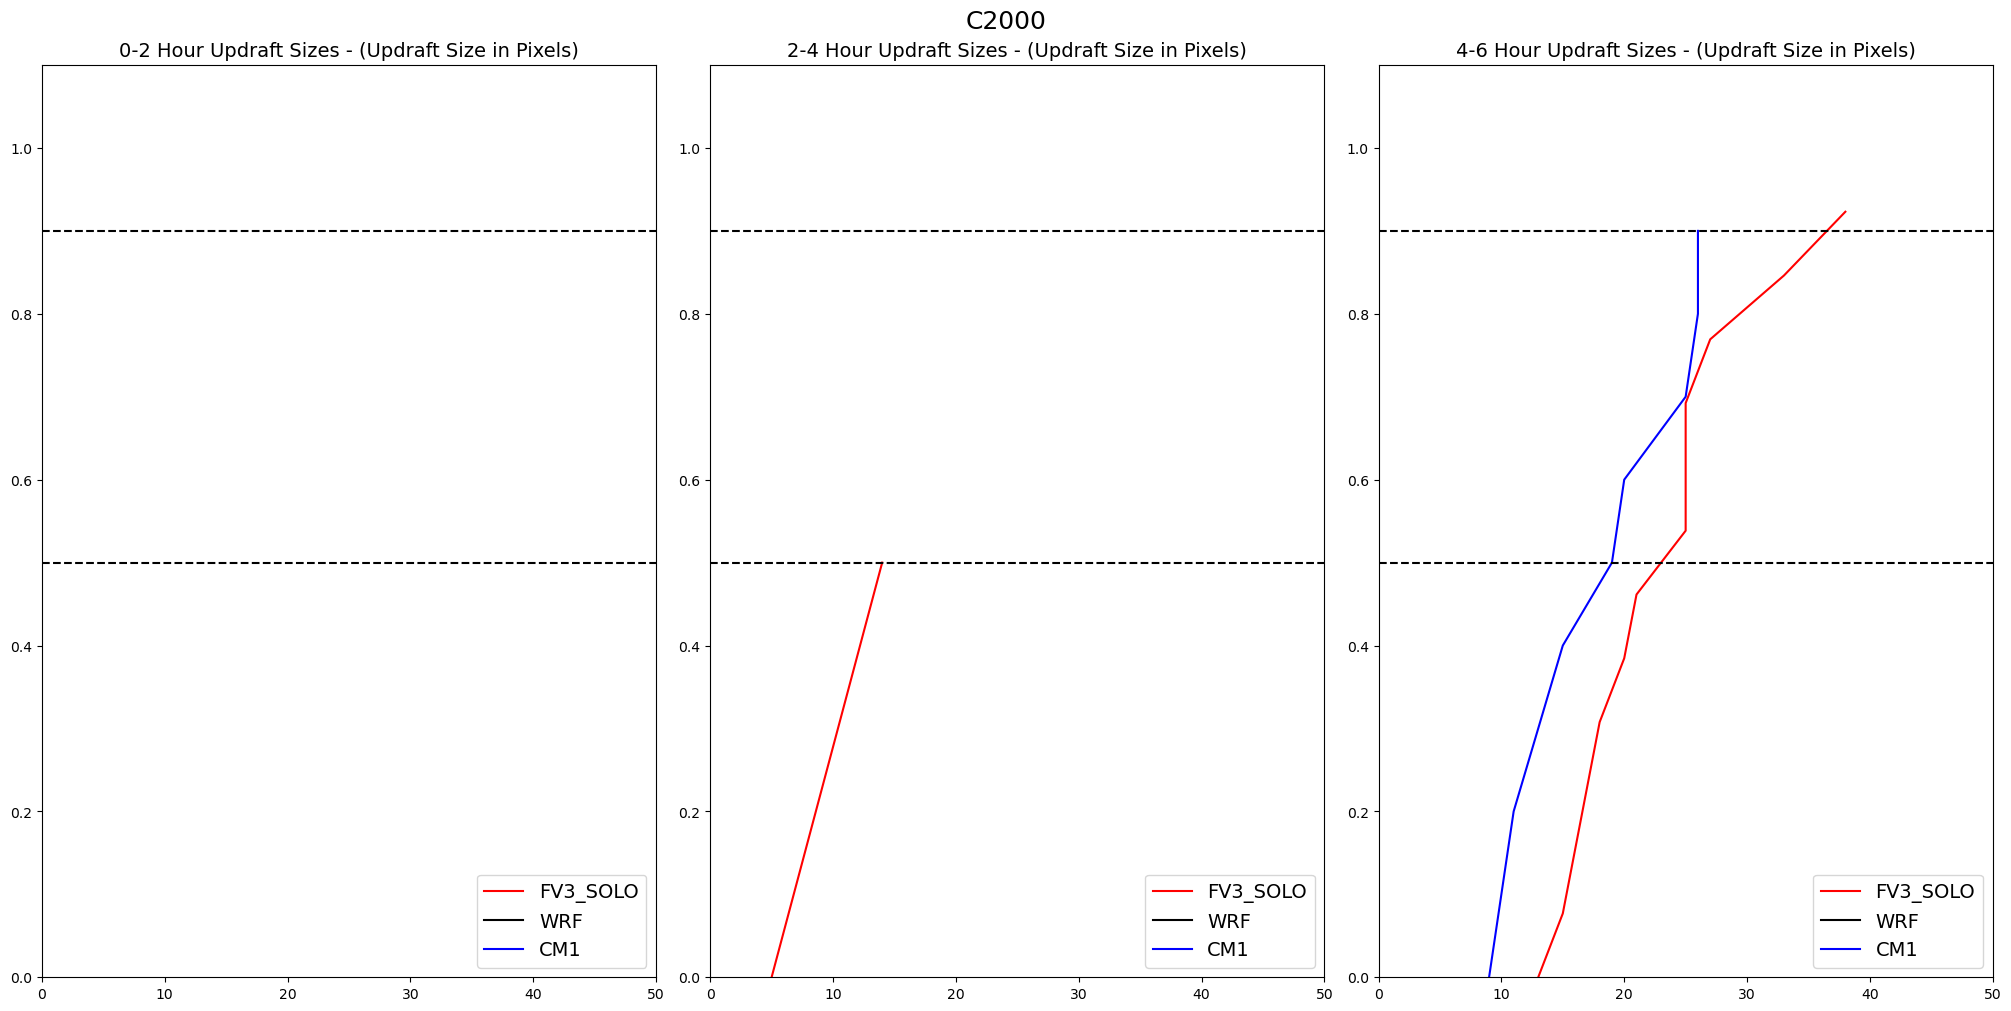

In [6]:

# # Just read stuff back in...
            
plot_sizes_driver( pickle2Obj('cm1_supercell_3km_profiles.pkl', retObj=False), 
                    pickle2Obj('wrf_supercell_3km_profiles.pkl', retObj=False),
                    pickle2Obj('solo_supercell_3km_profiles.pkl',retObj=False), plabel = 'supercell_3km' )


In [62]:
path = "/work/wicker/WRF/WRF/test/em_quarter_ss/supercell_3km_C3500/wrfout_d01_0001-01-01_00:00:00"
dsout = {}
with open(os.path.join(os.path.dirname(path), 'dbz.npz'), 'rb') as f:
    dsout['dbz'] = np.load(f)



 Added default filename to path input:  /work/wicker/Odin_scr/cm1r20.3/run/supercell_3km_qv16/cm1out.nc
------------------------------------------------------------------------------------------------------------------------ 

 Reading:  /work/wicker/Odin_scr/cm1r20.3/run/supercell_3km_qv16/cm1out.nc 


 Reading external DBZ file: /work/wicker/Odin_scr/cm1r20.3/run/supercell_3km_qv16/dbz.npz
 Completed reading in:  /work/wicker/Odin_scr/cm1r20.3/run/supercell_3km_qv16/cm1out.nc 

------------------------------------------------------------------------------------------------------------------------
1


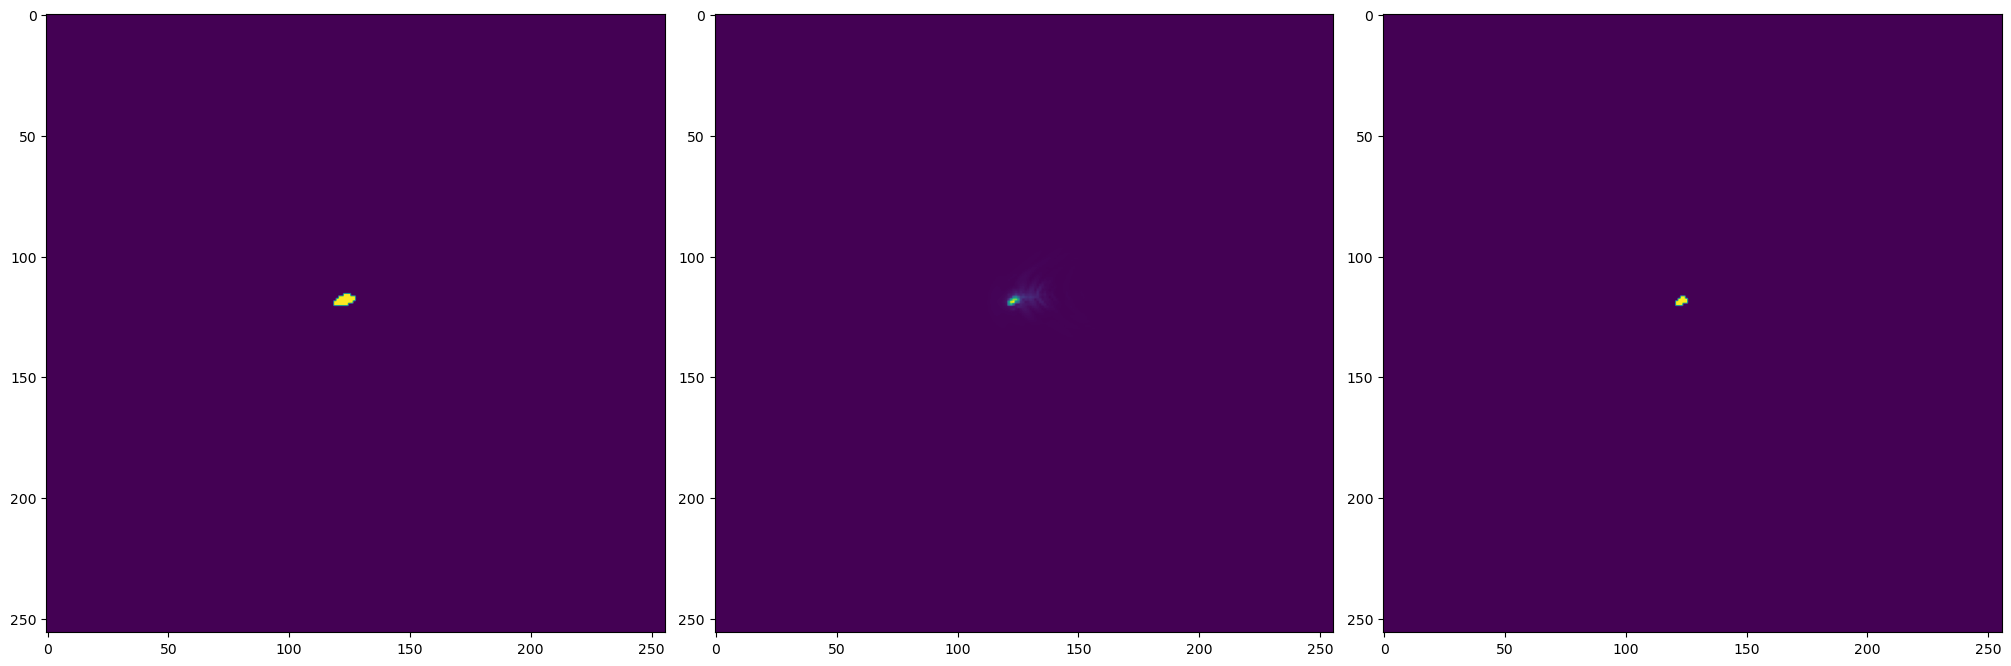

2


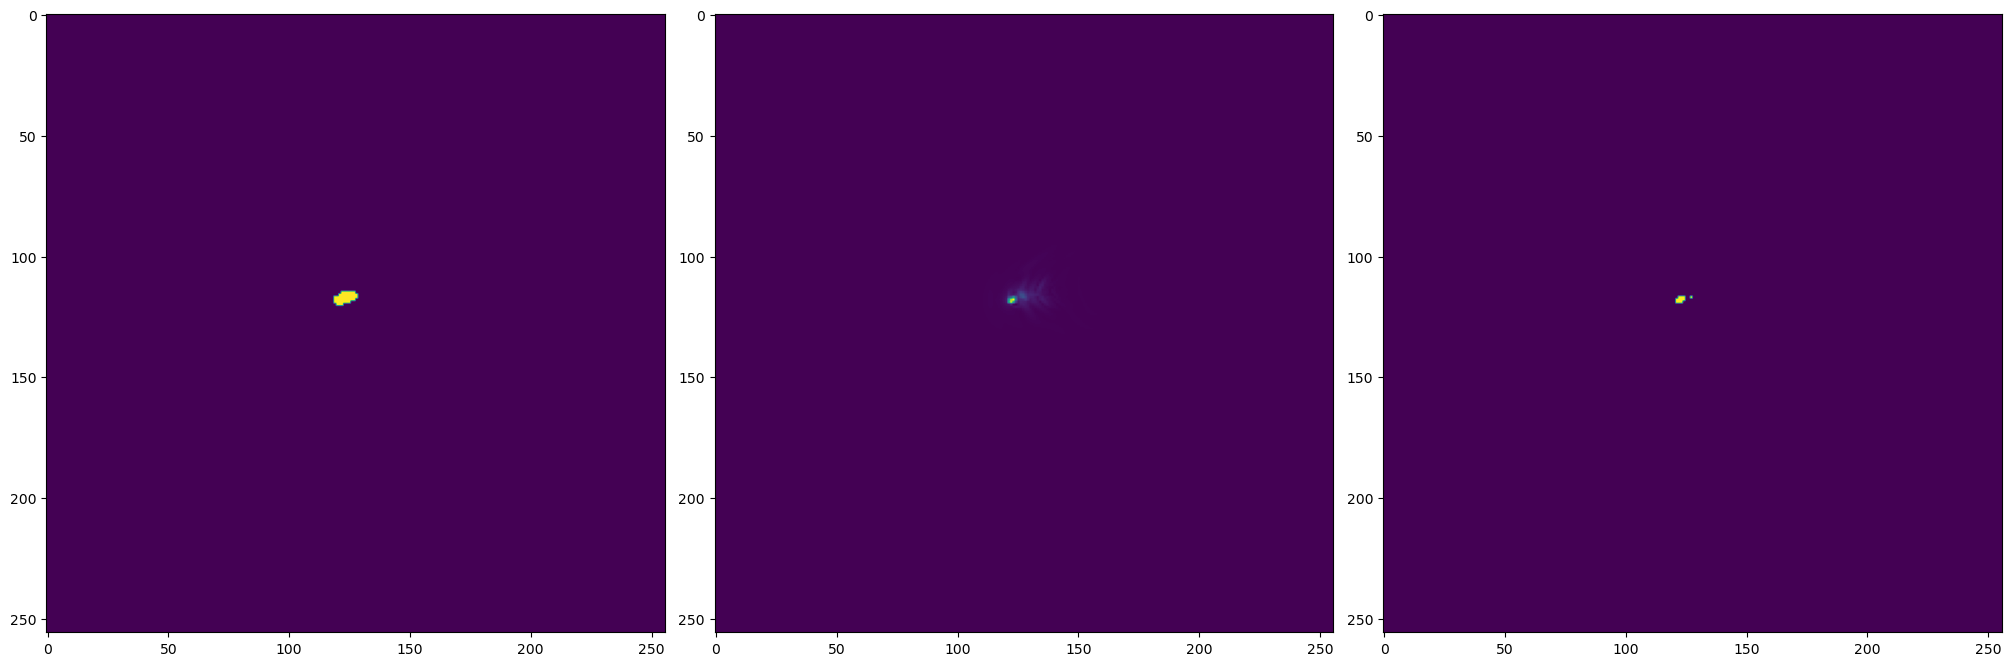

1


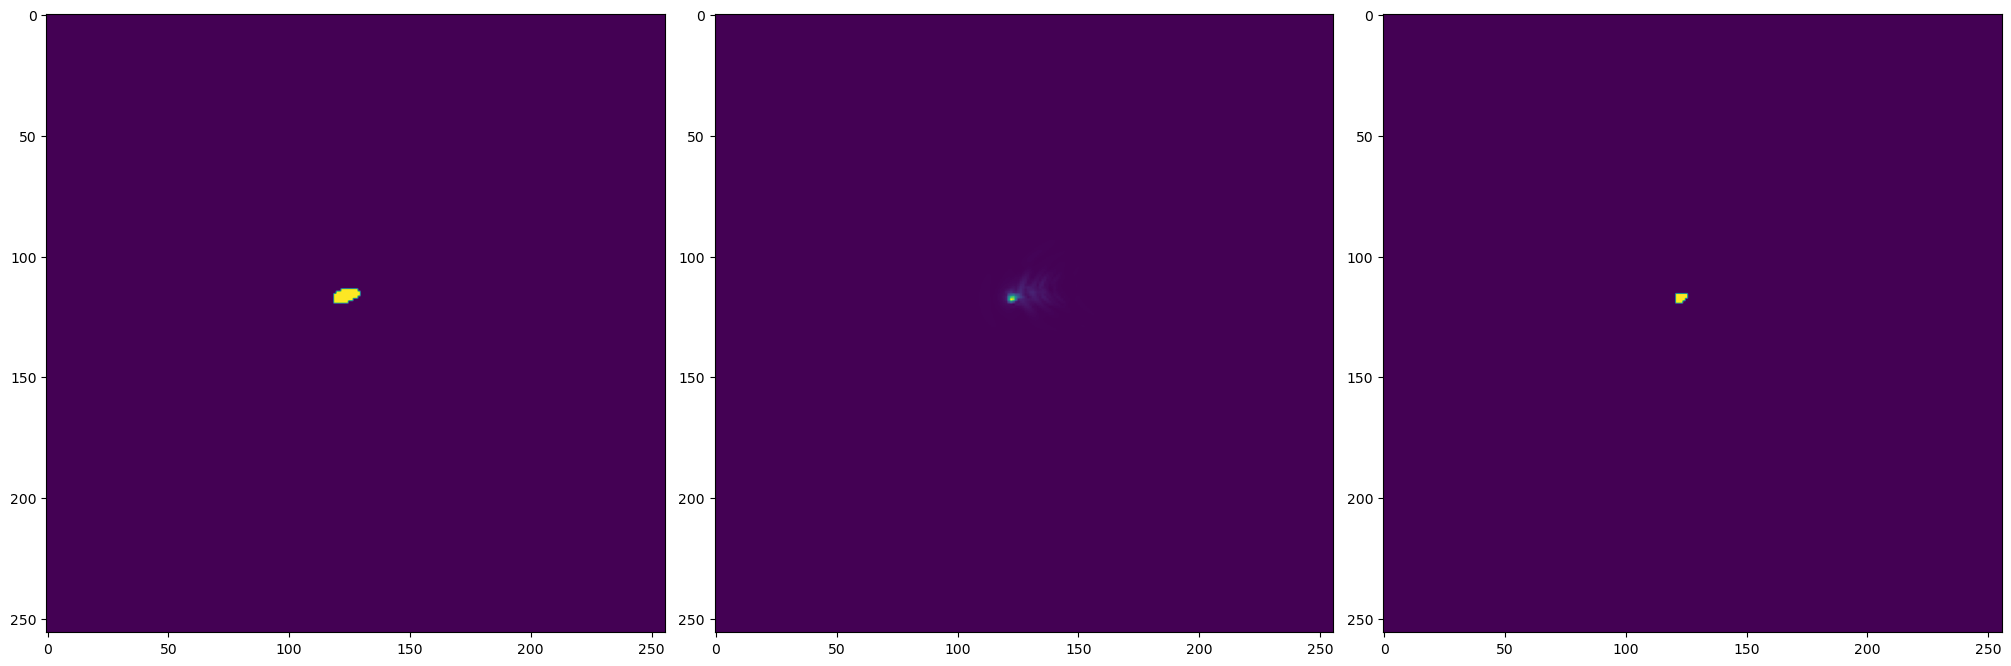

1


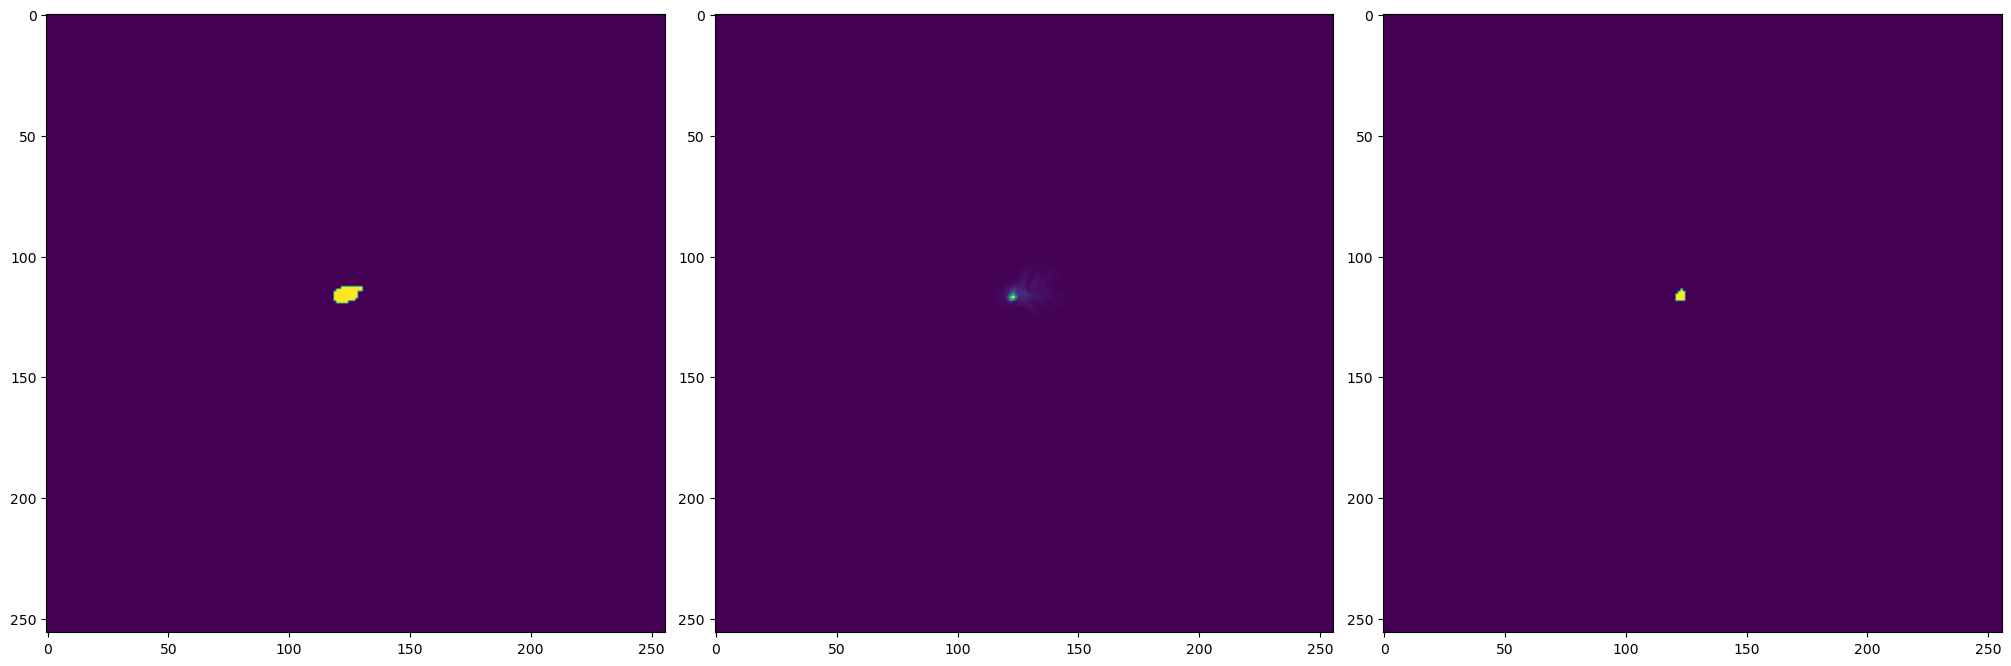

1


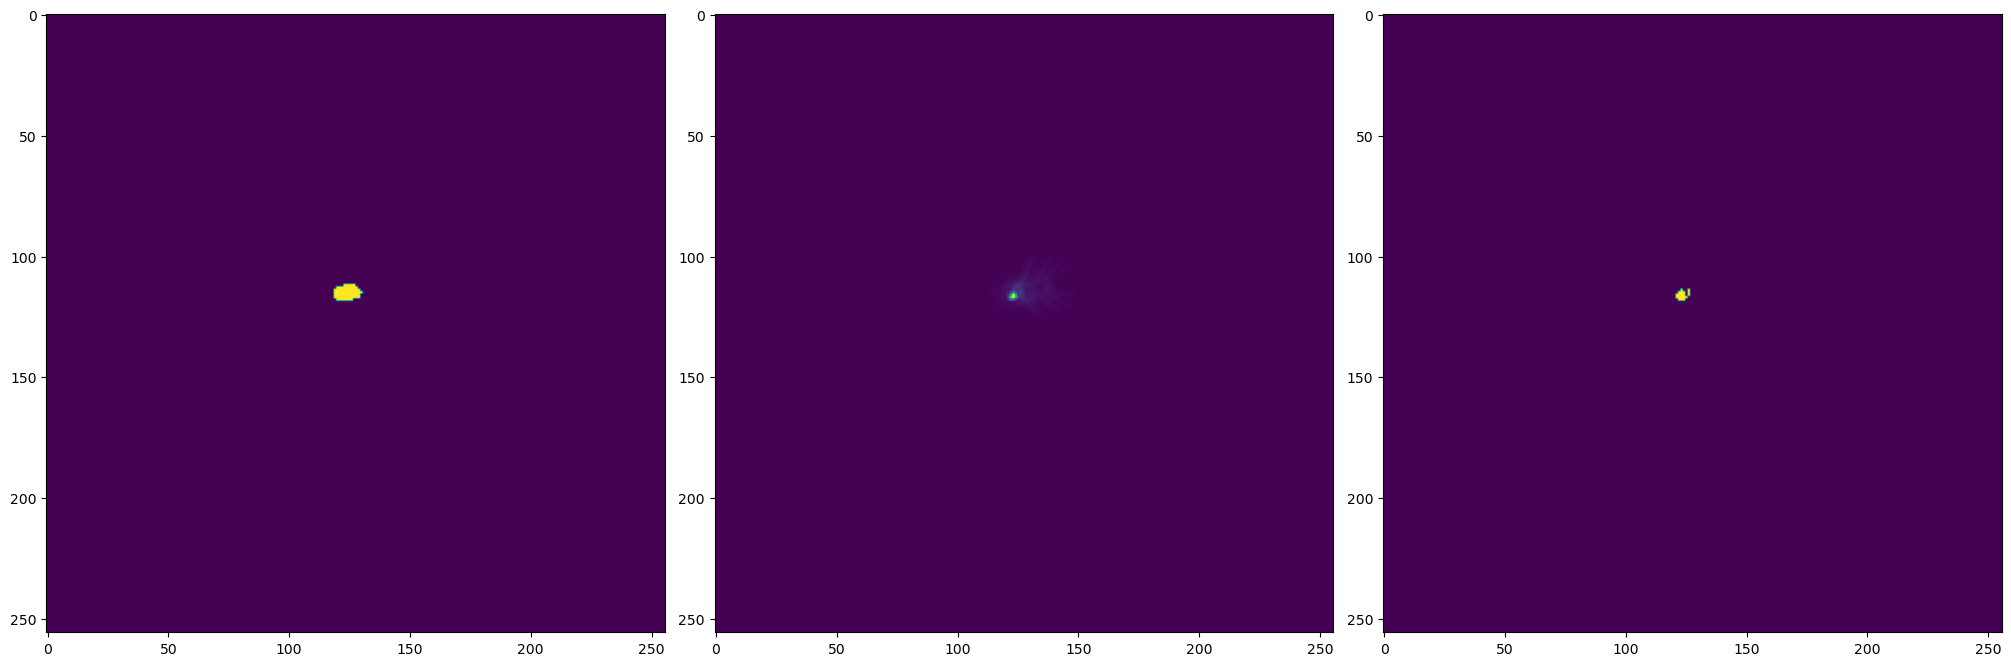

1


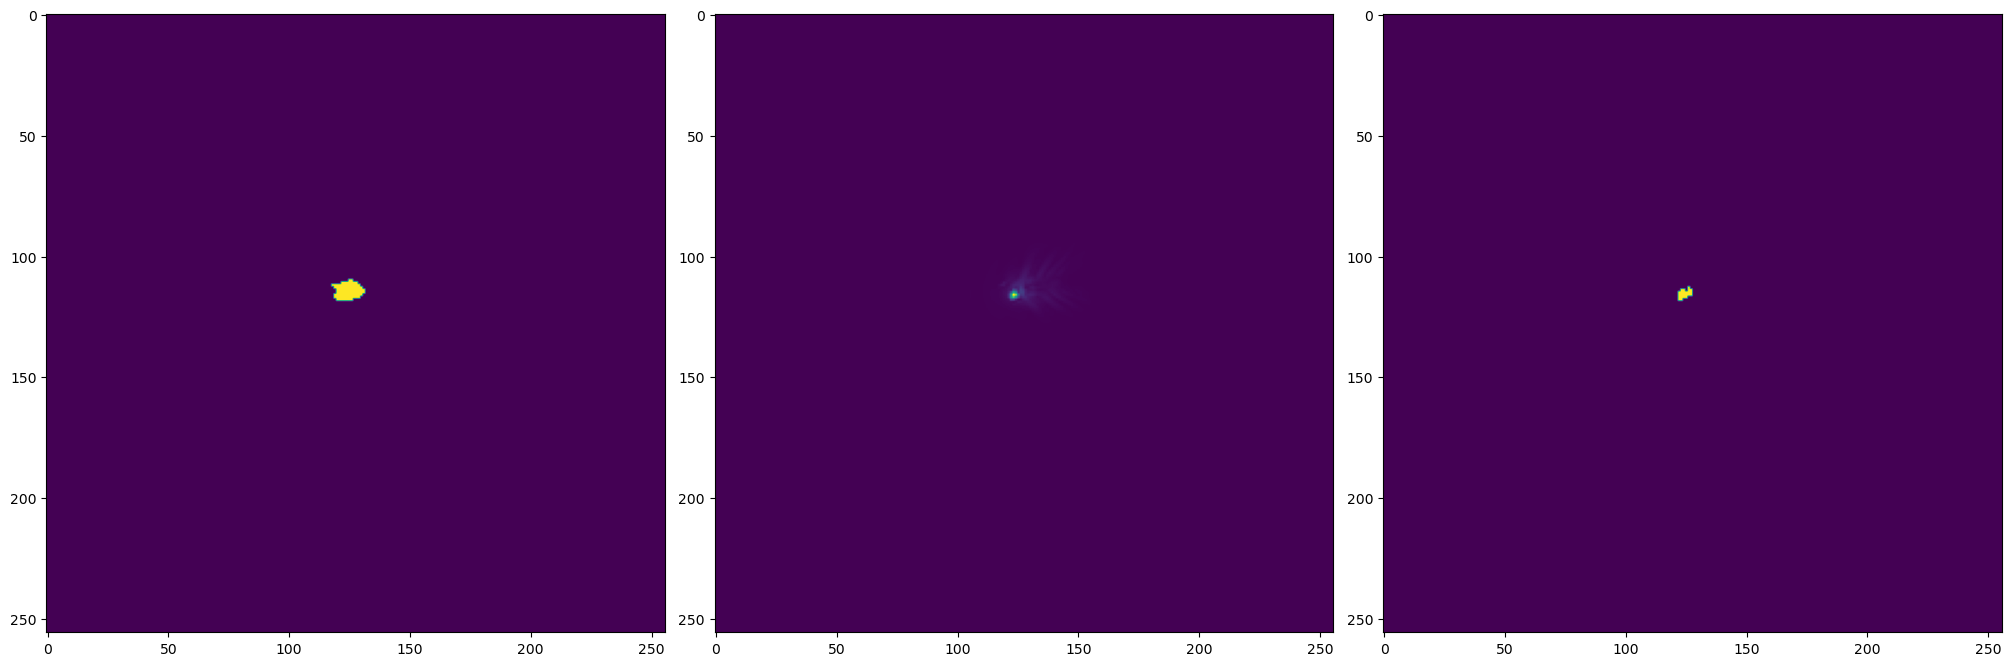

1


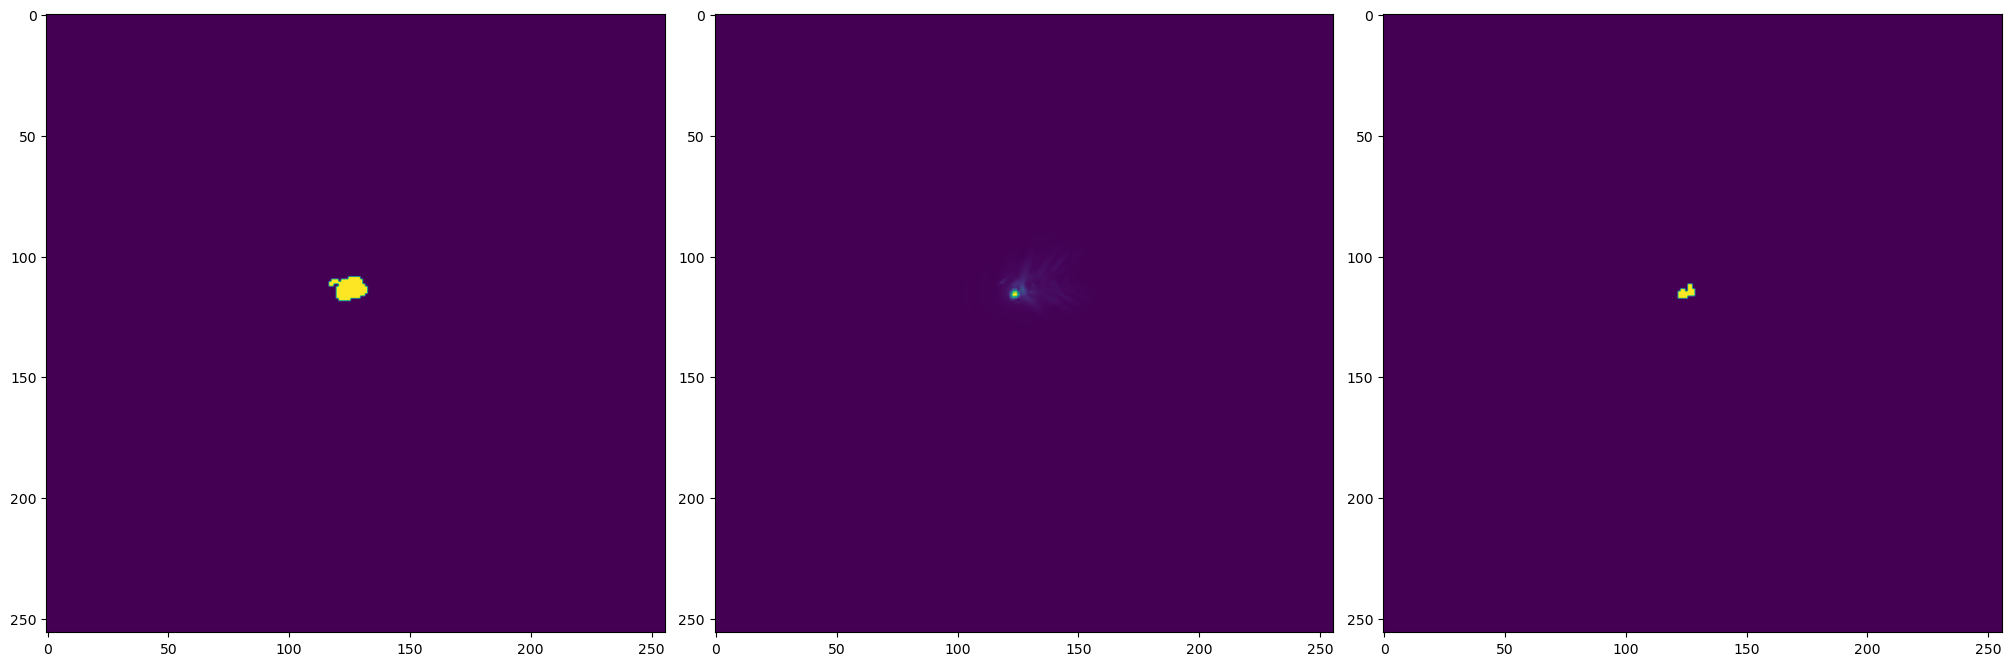

2


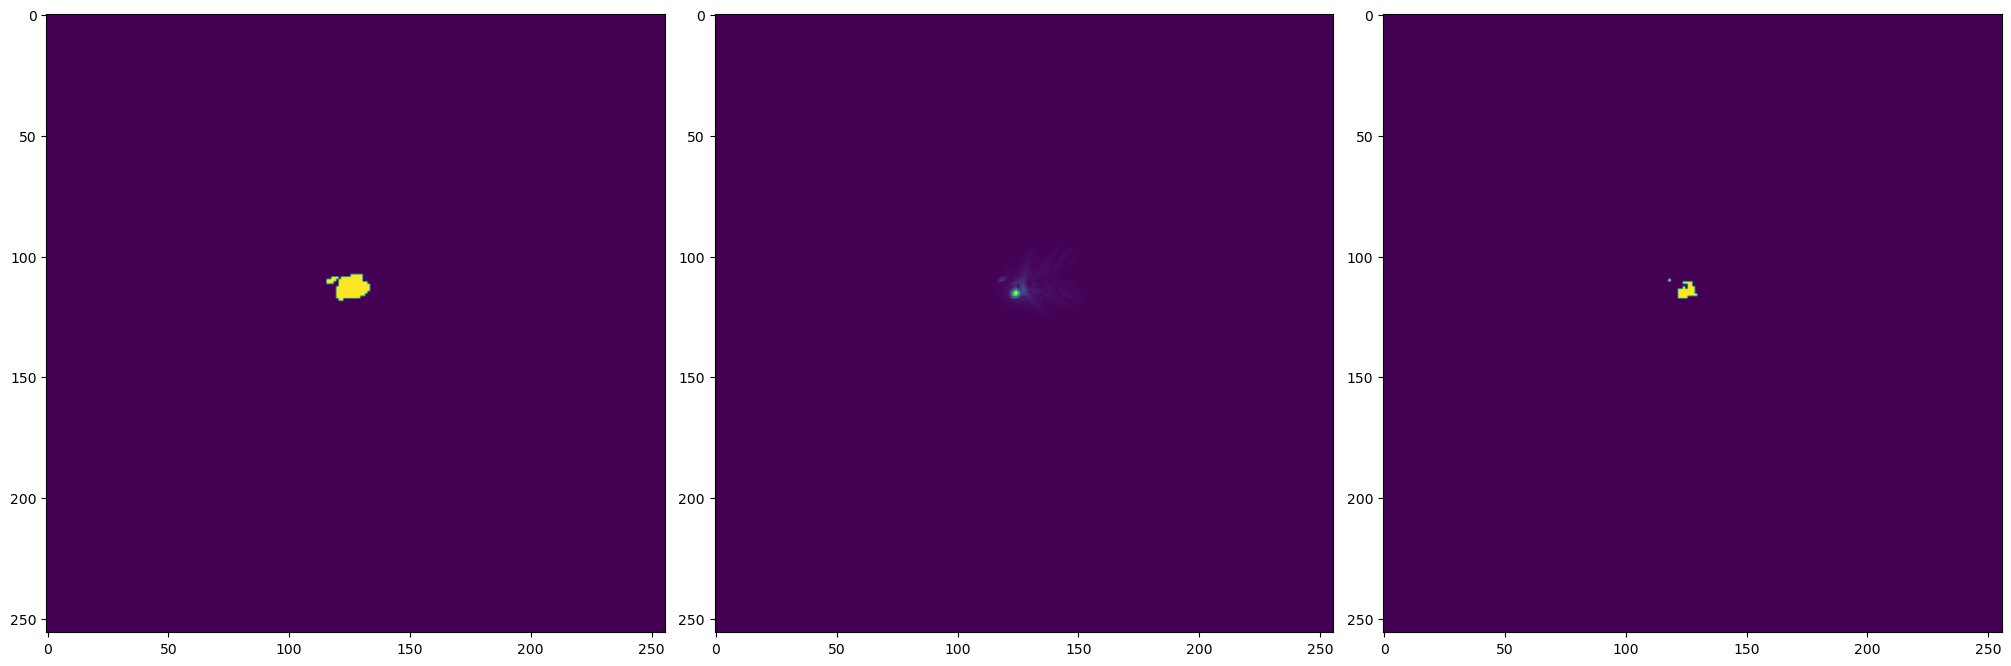

2


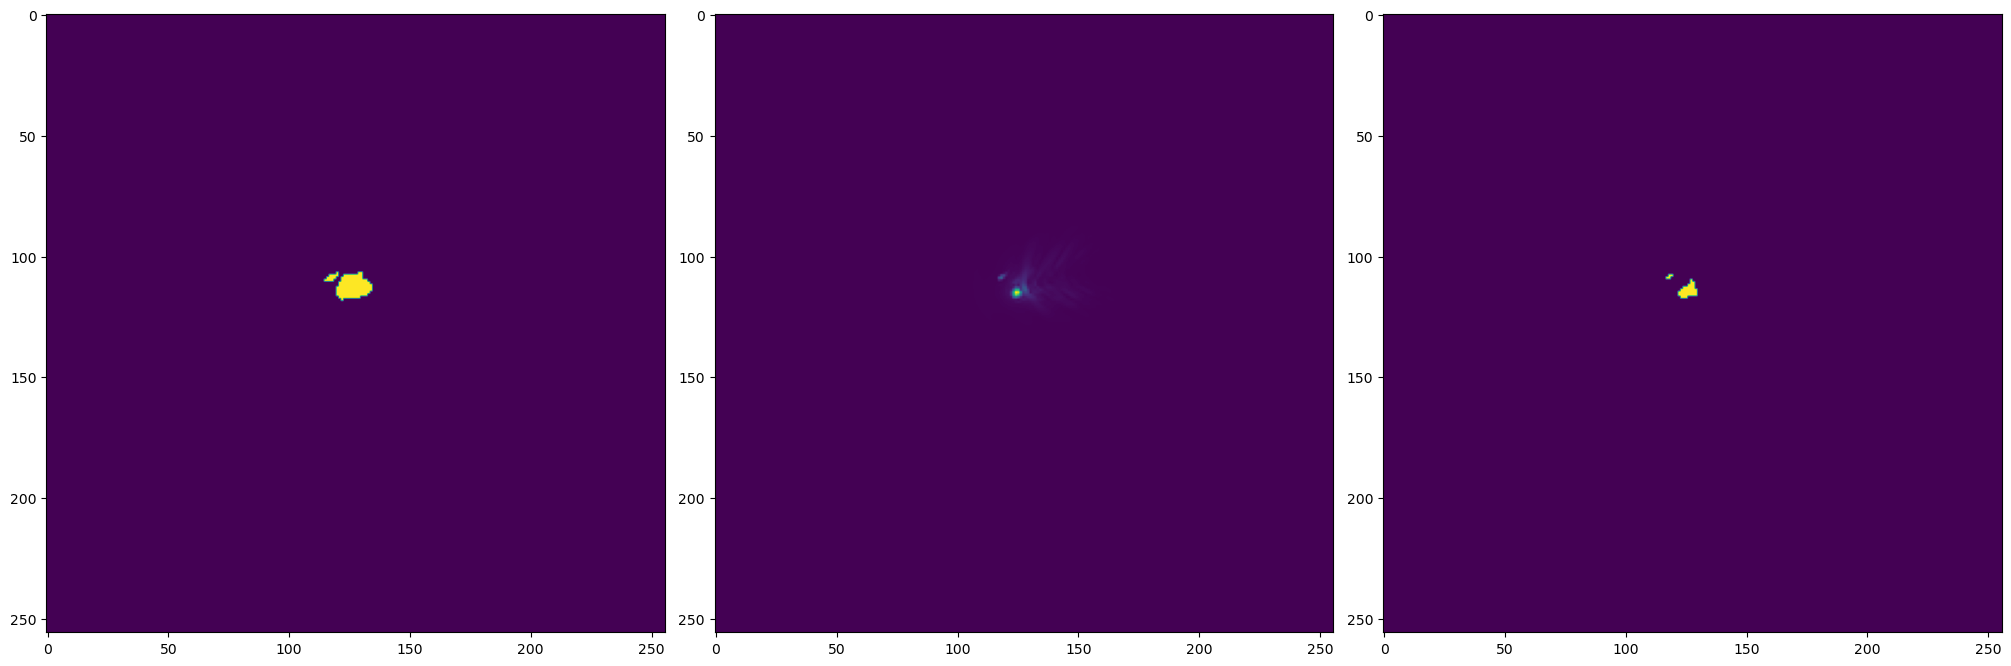

3


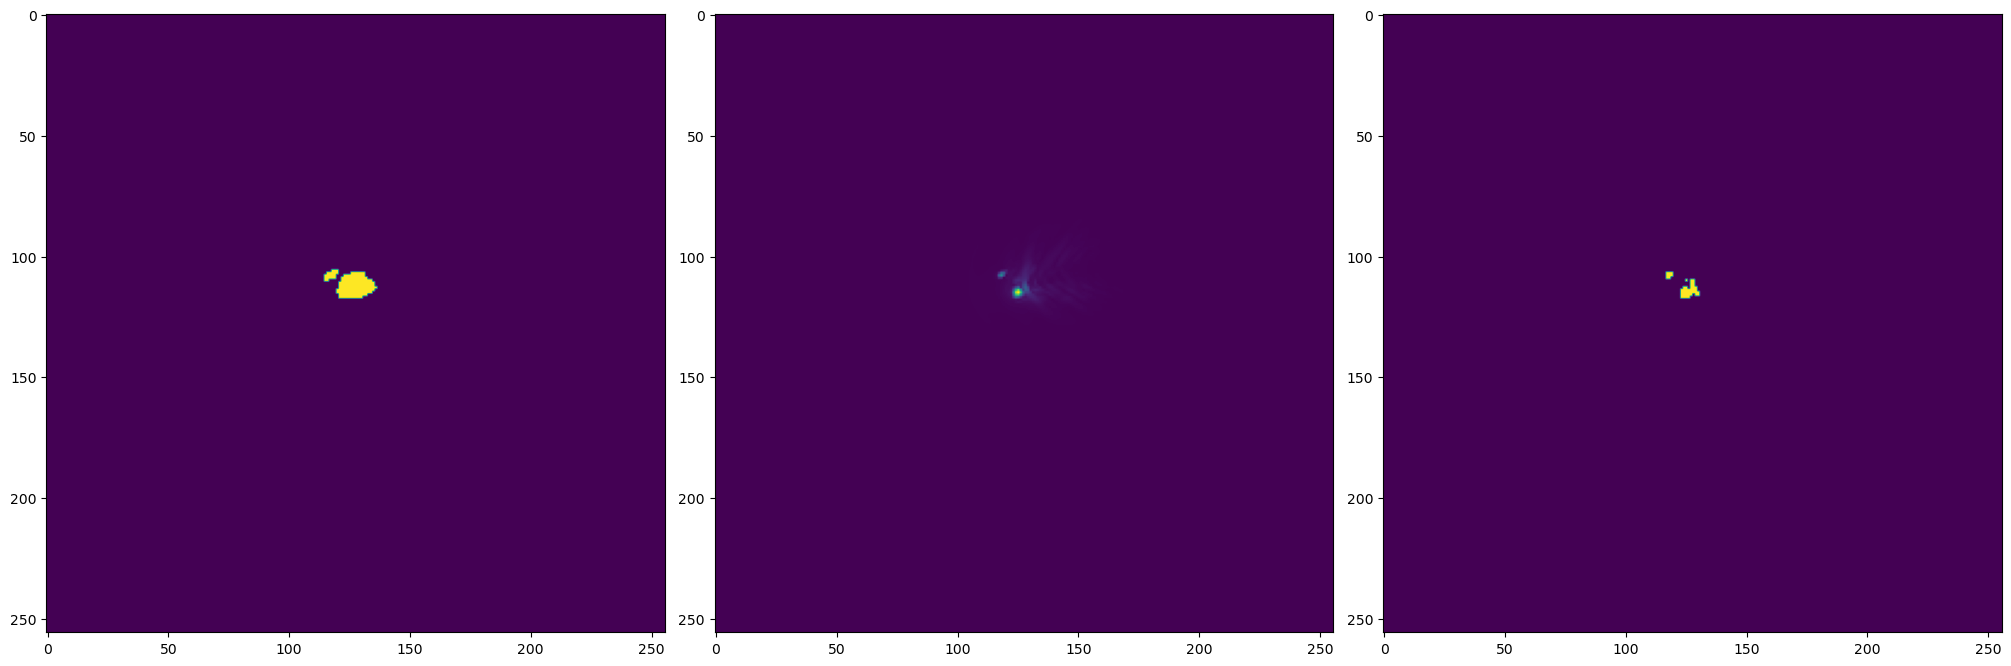

3


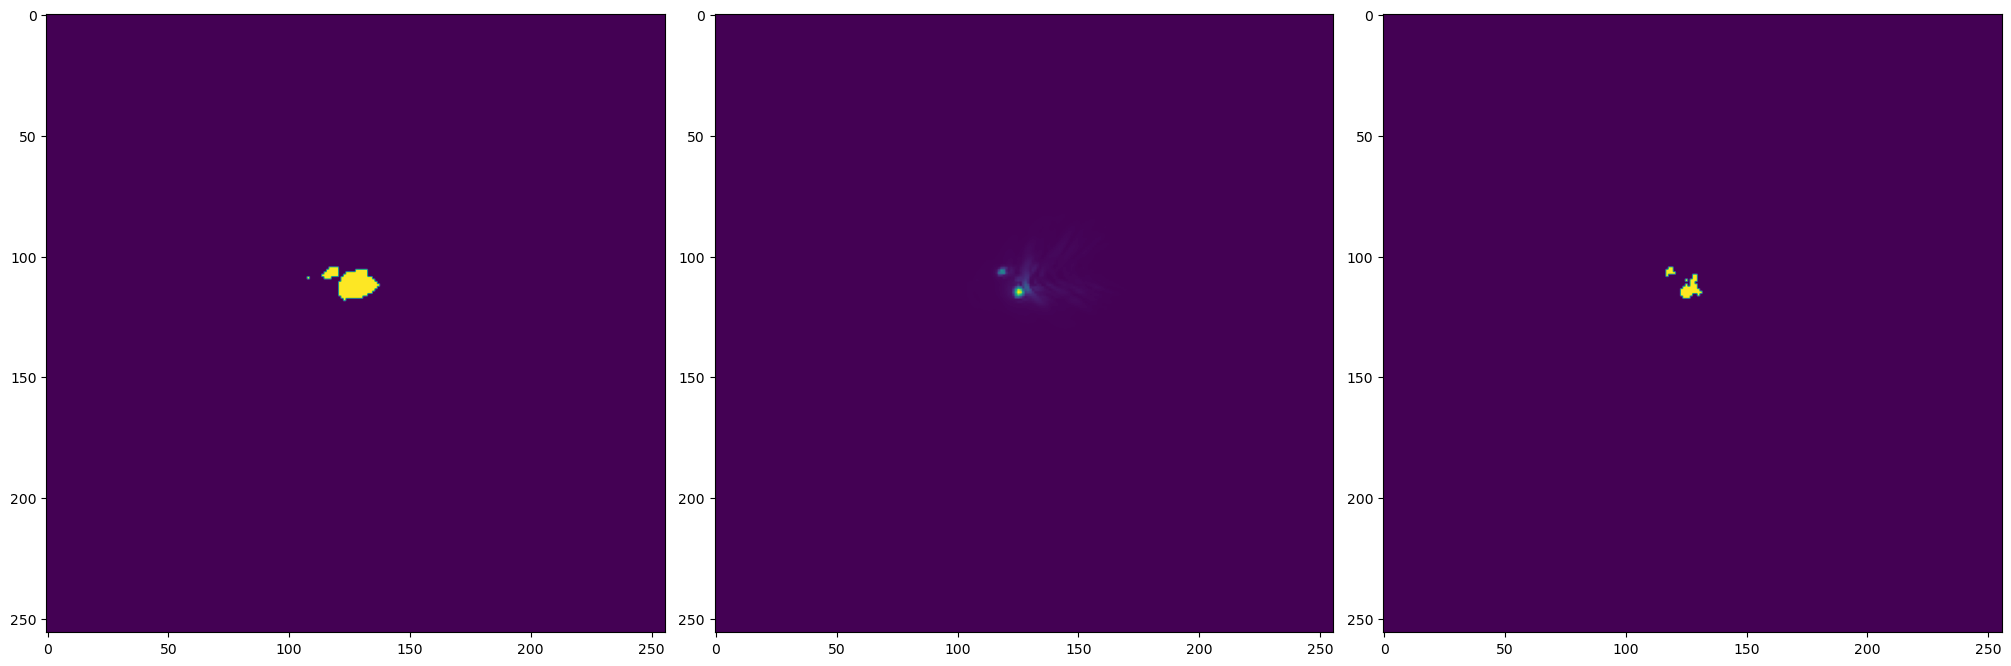

2


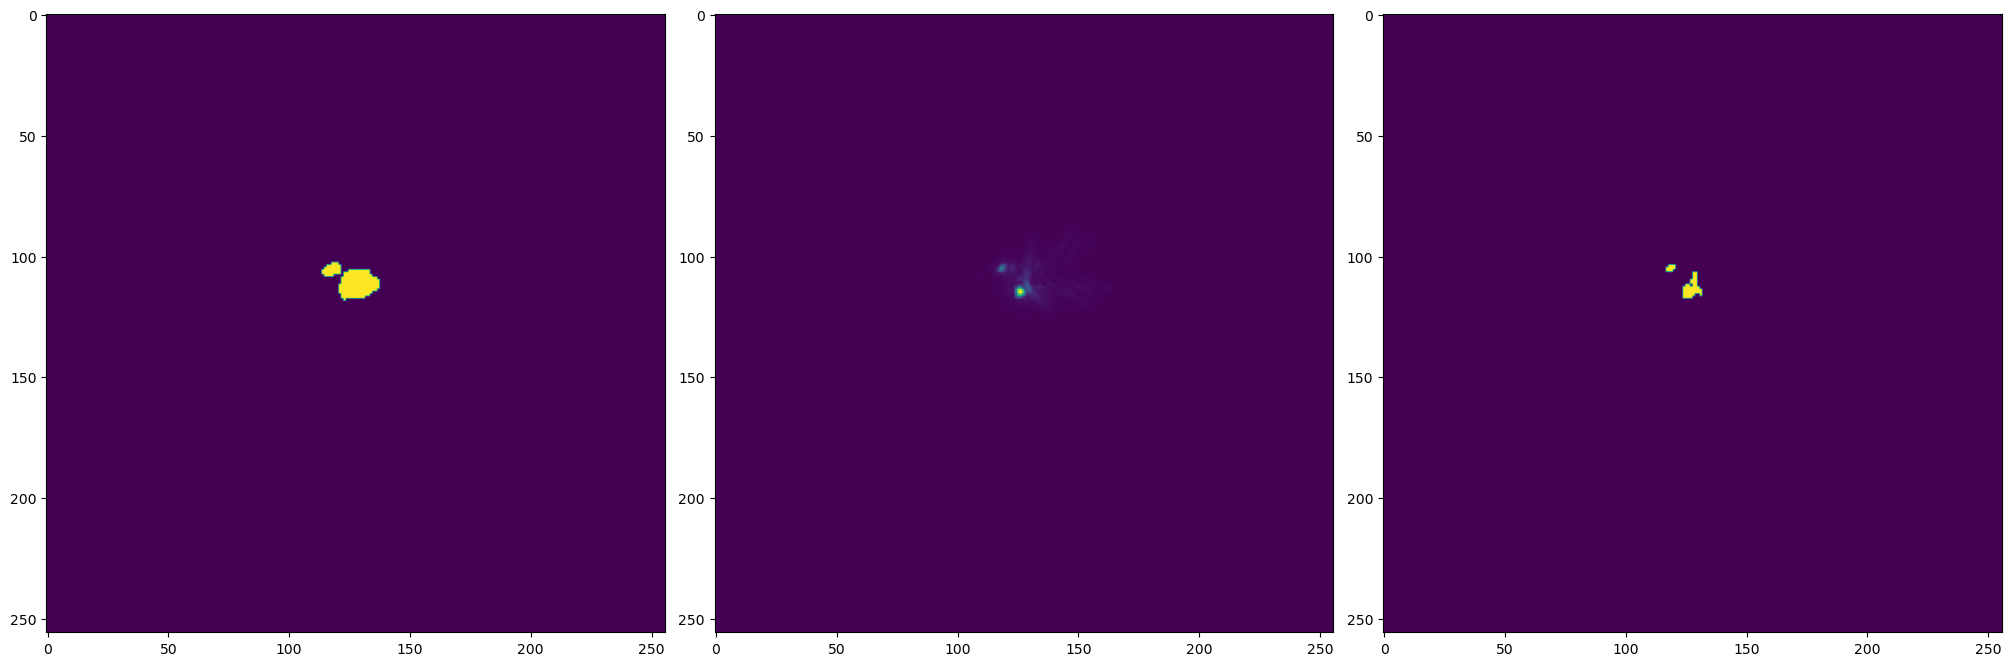

3


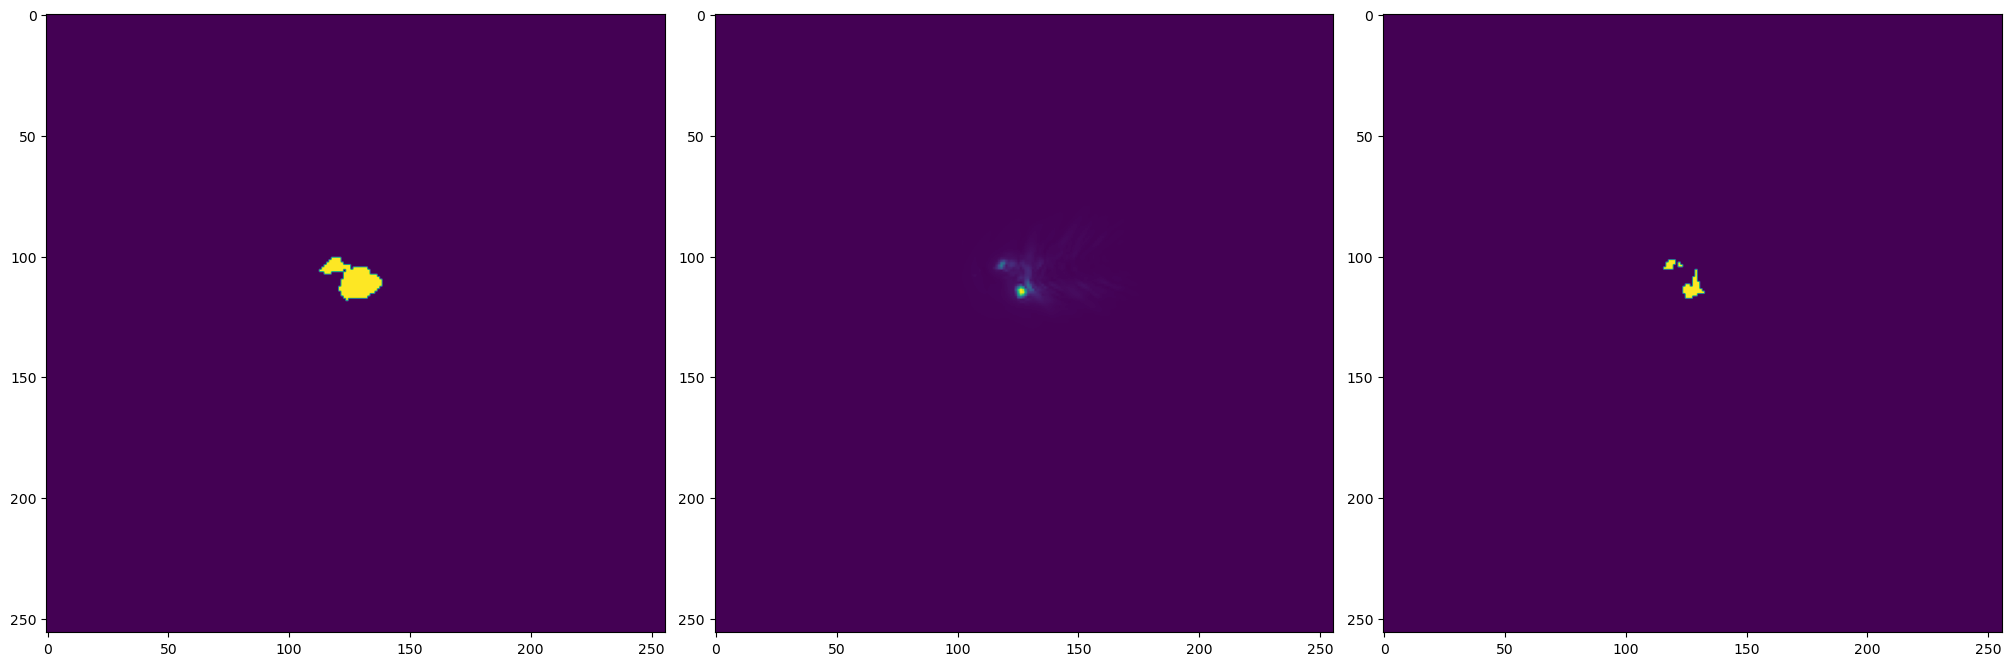

2


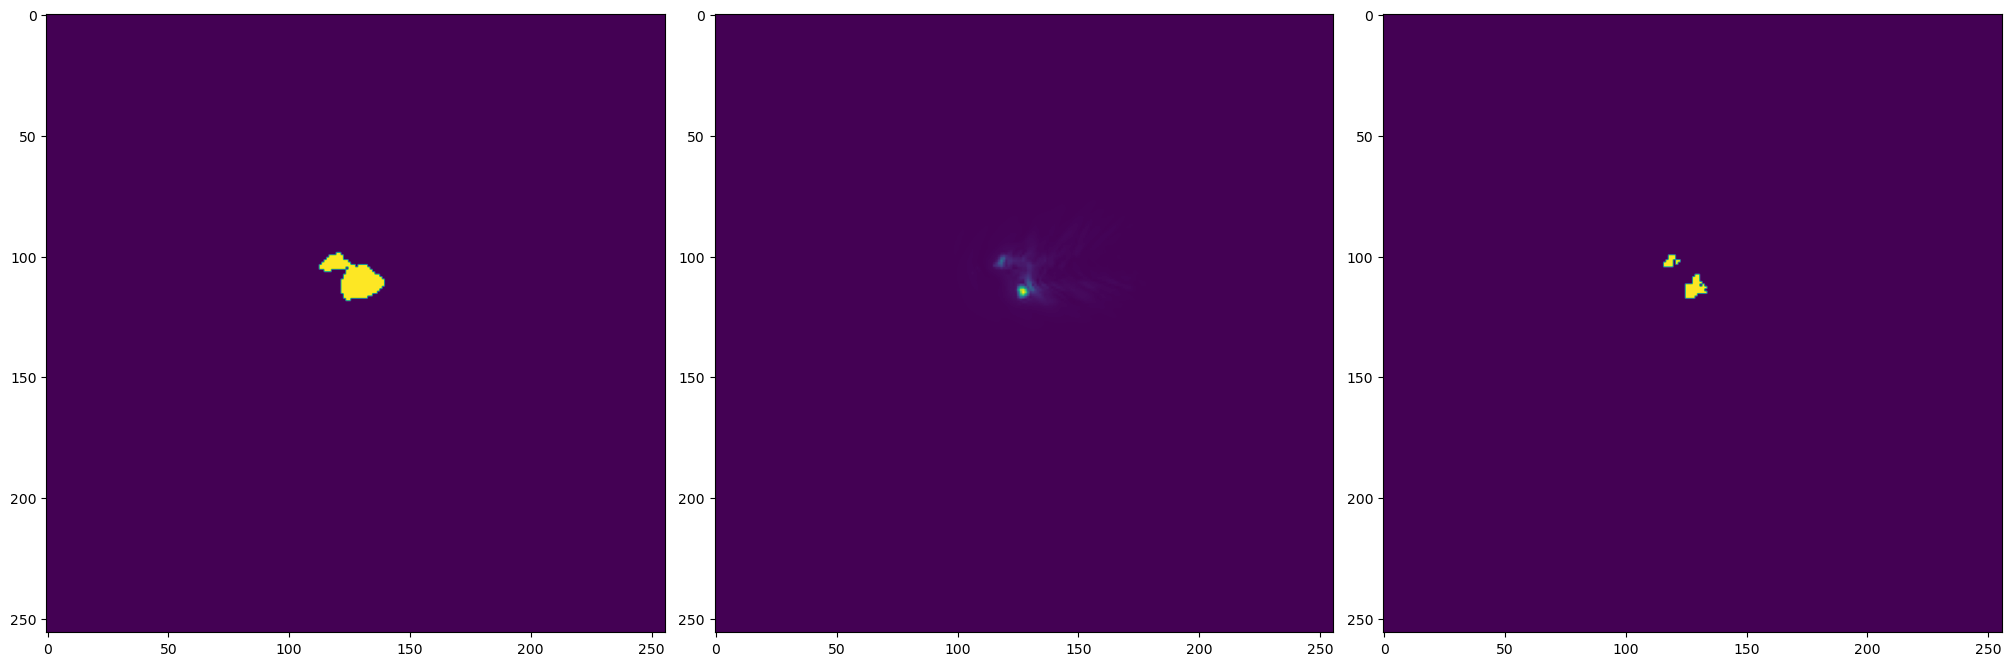

2


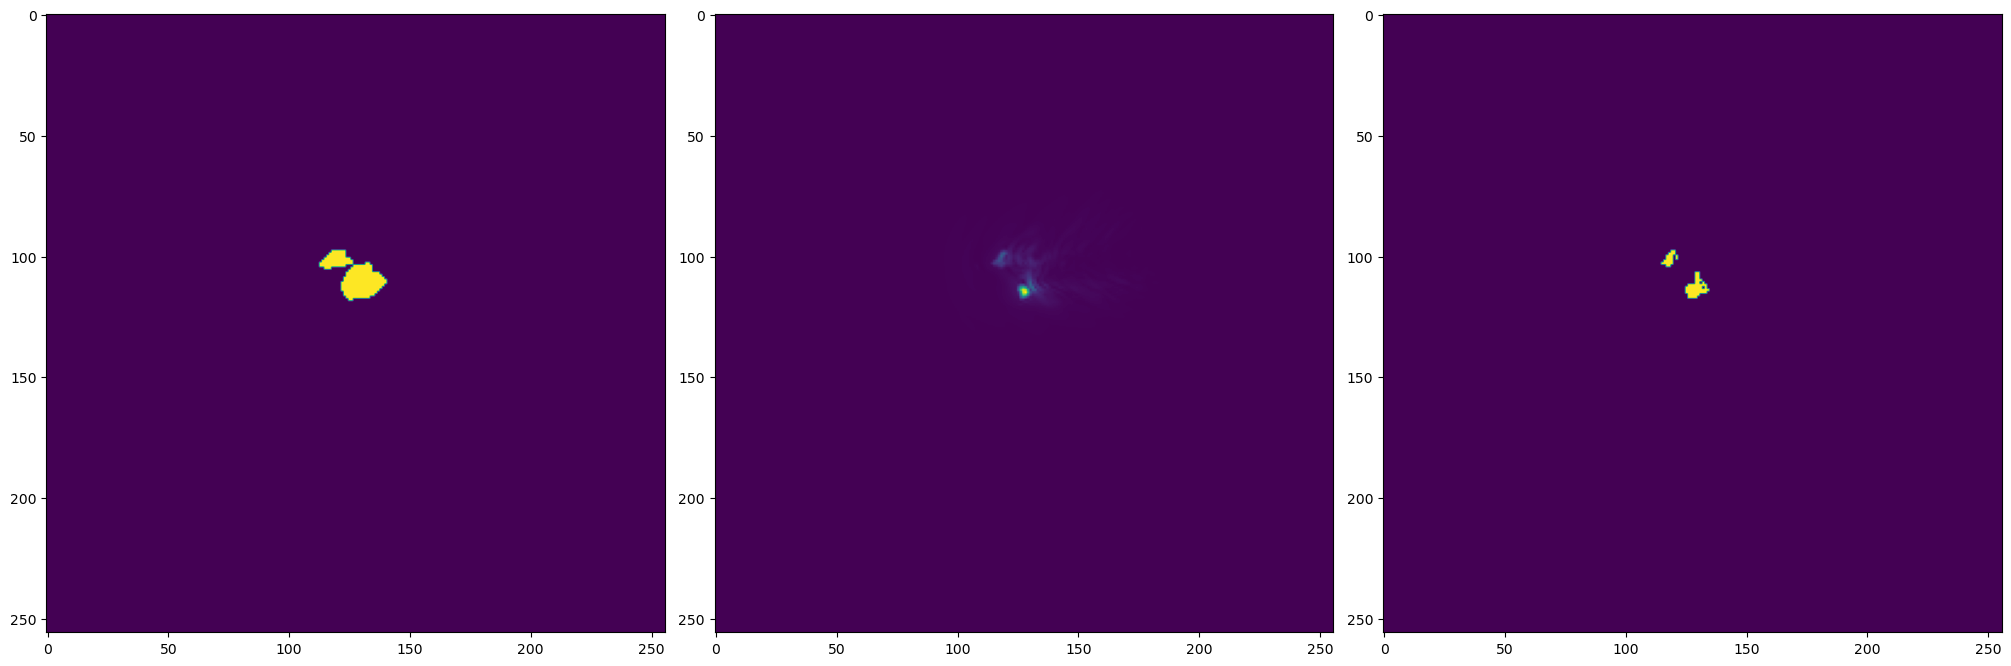

2


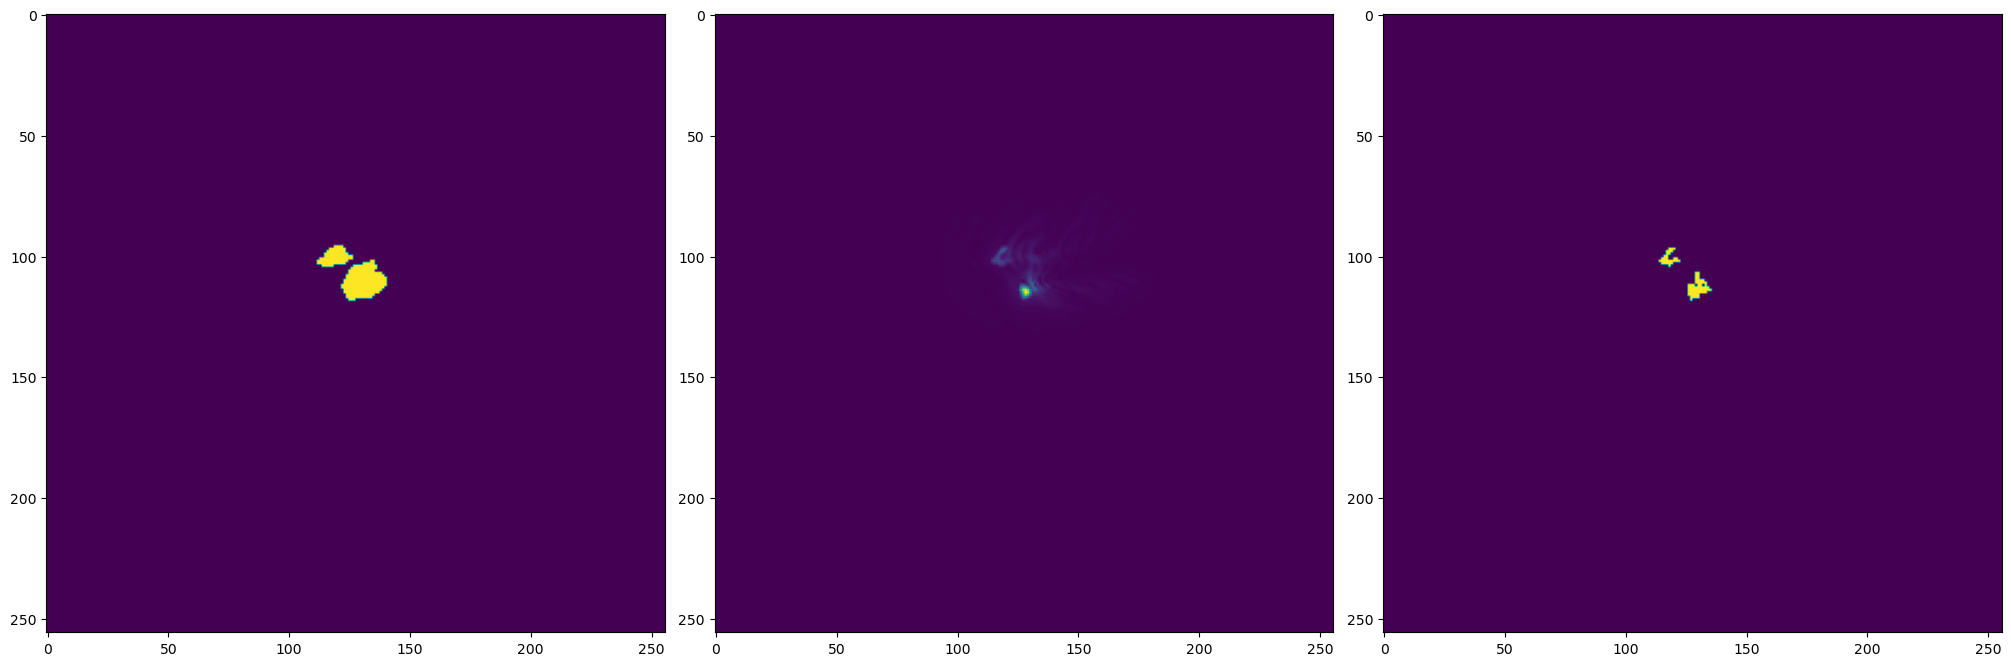

2


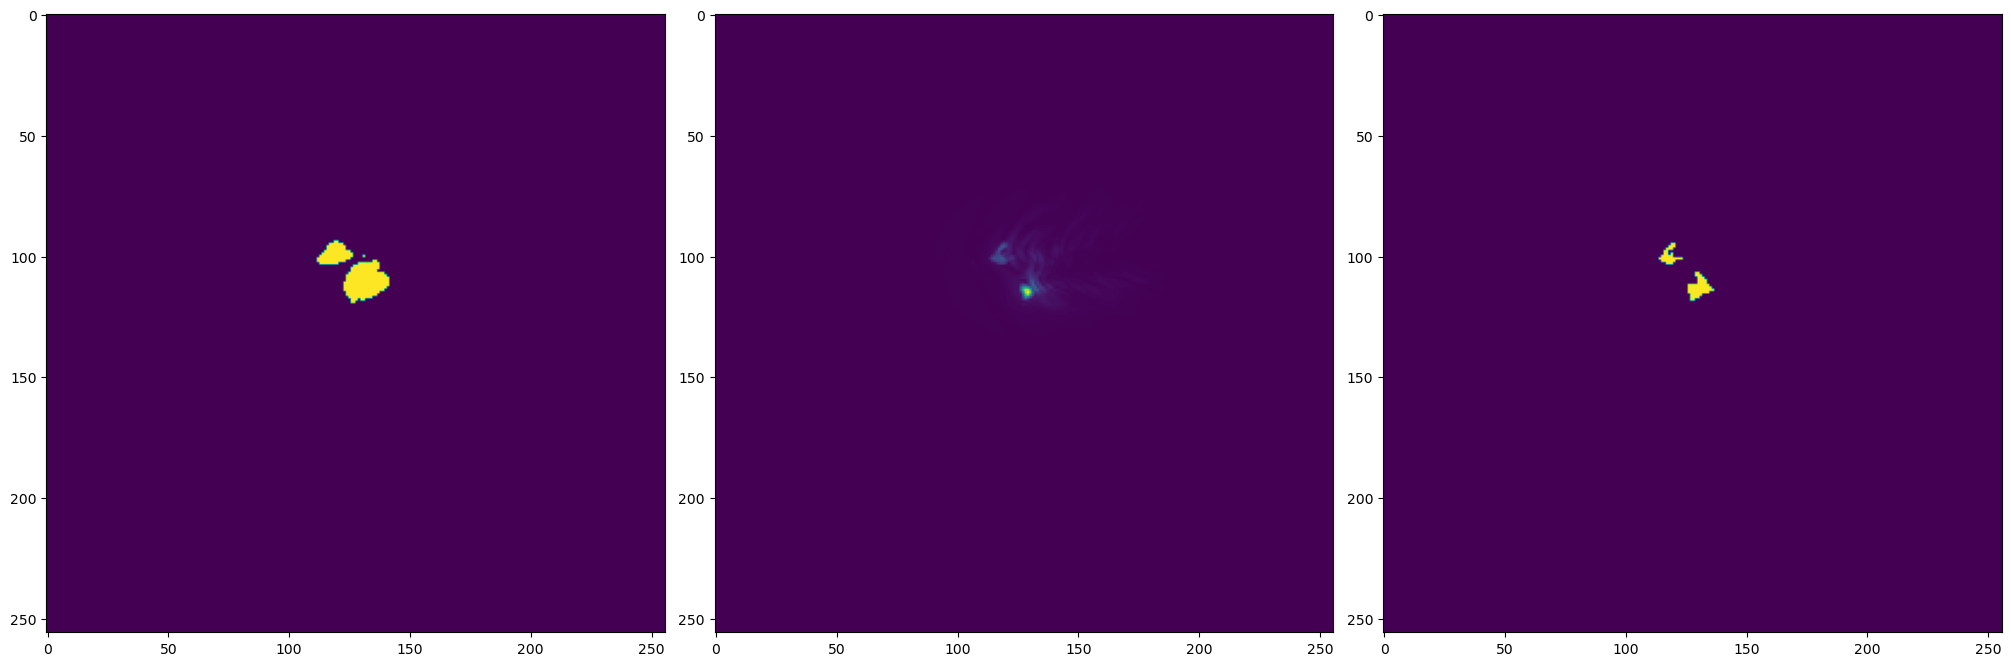

2


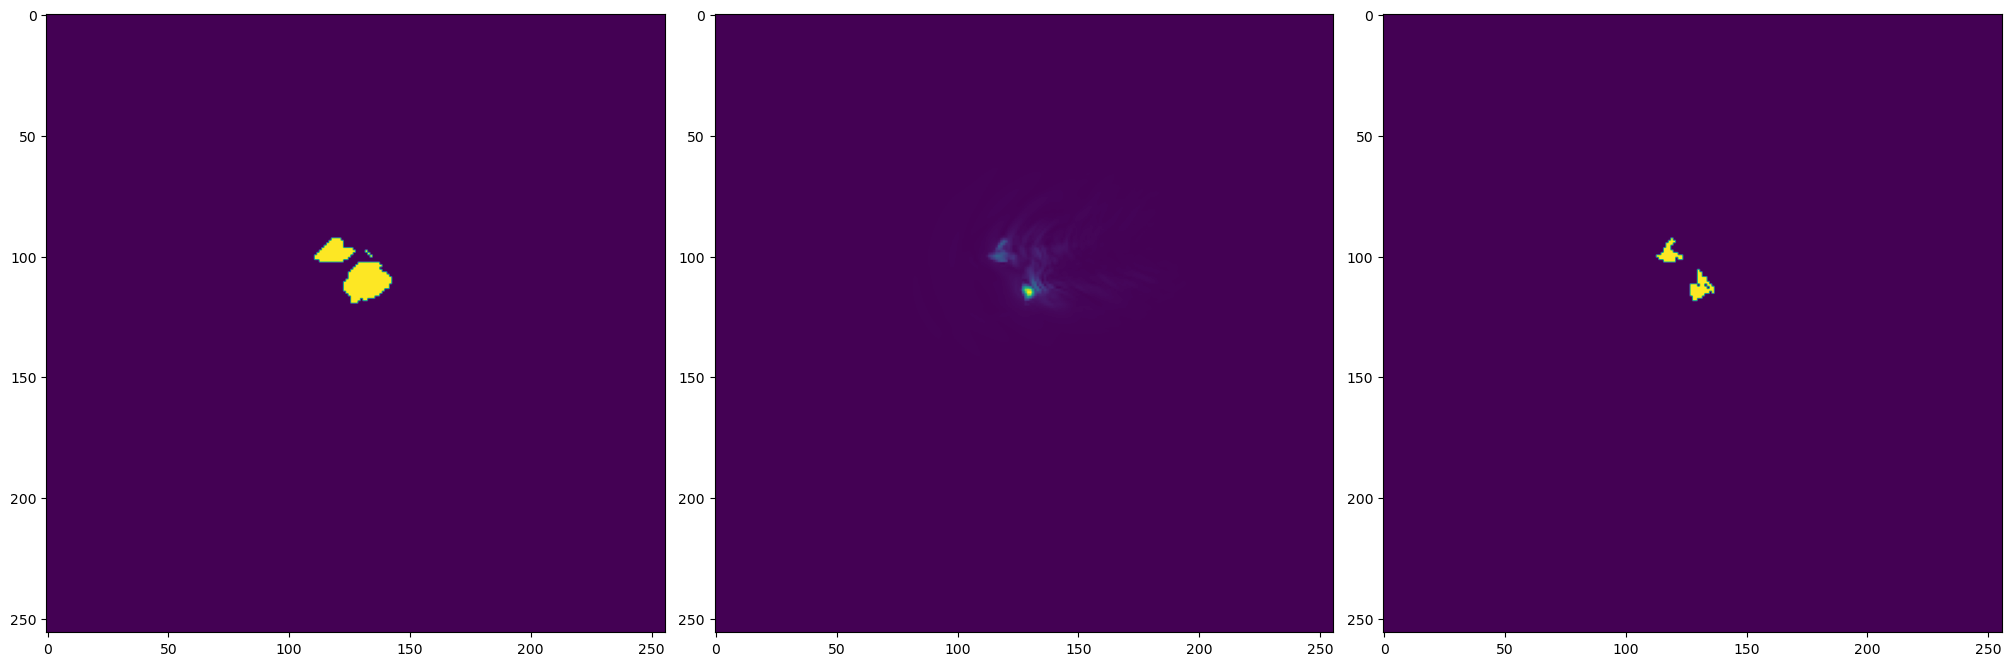

3


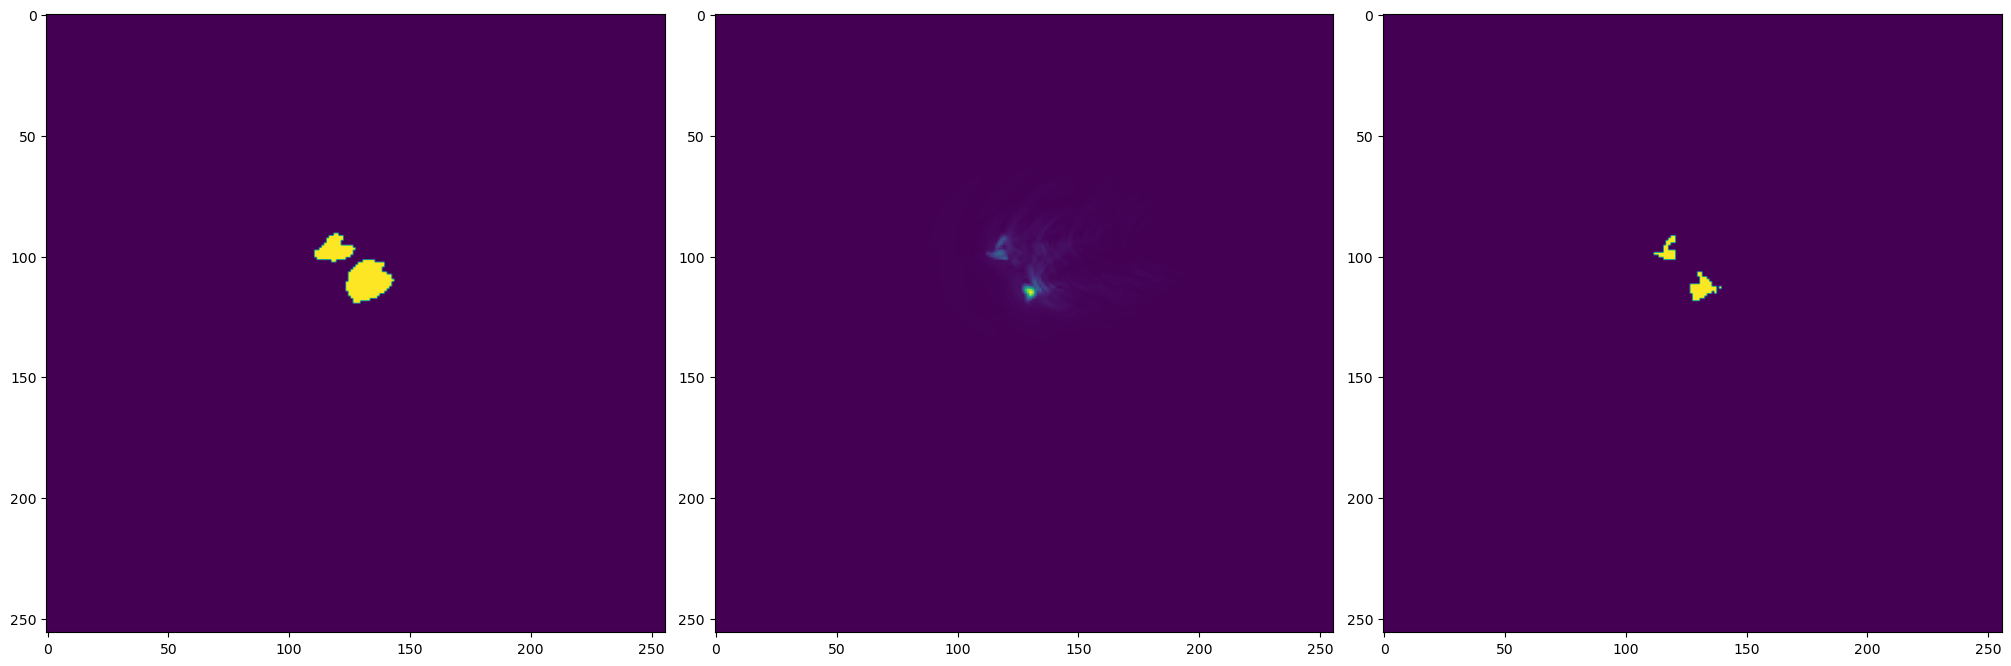

3


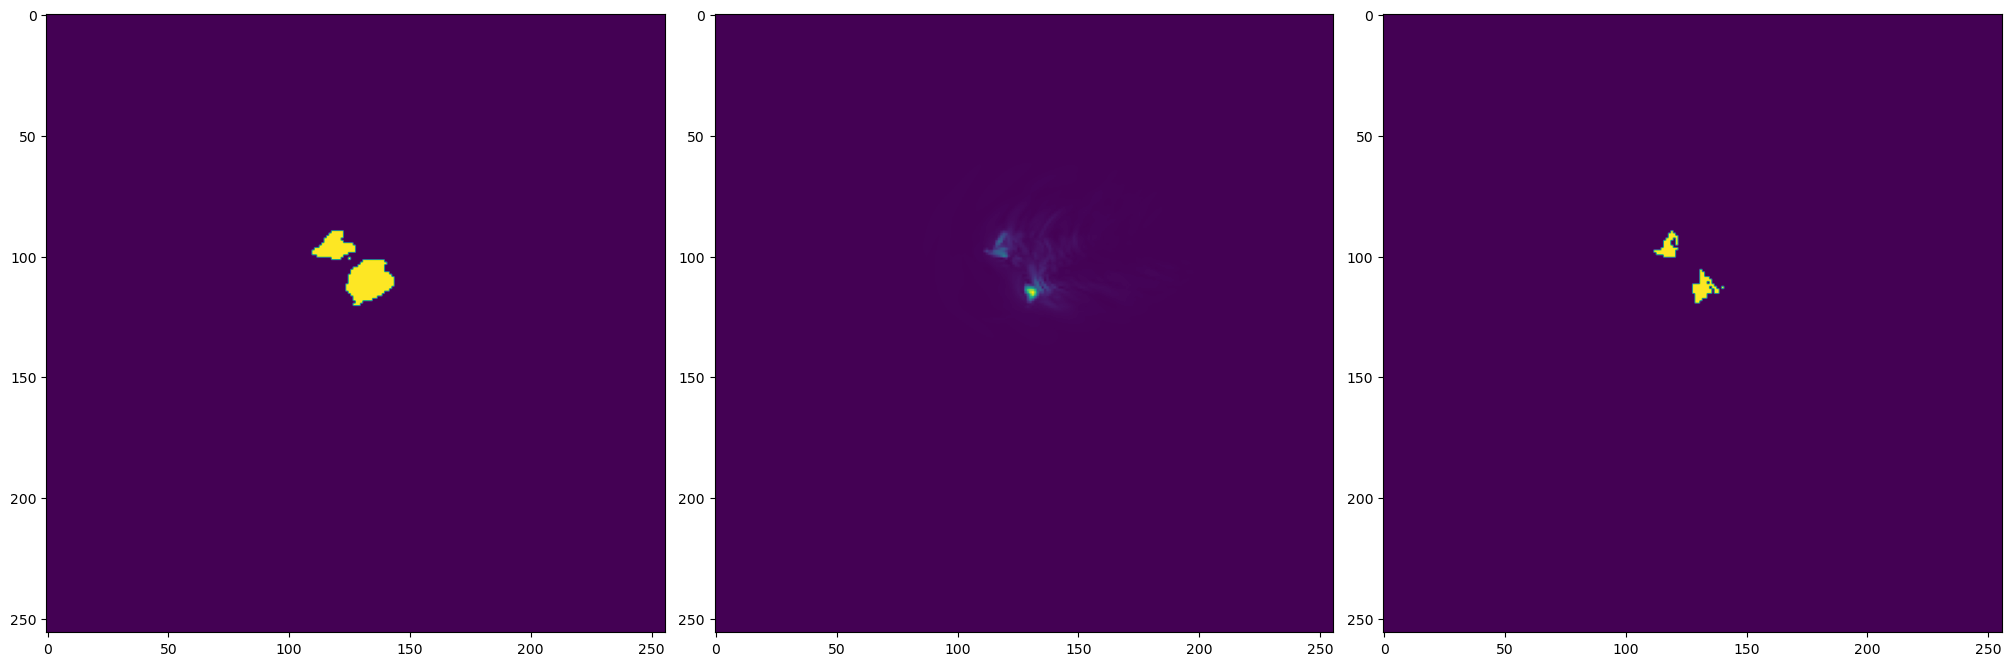

2


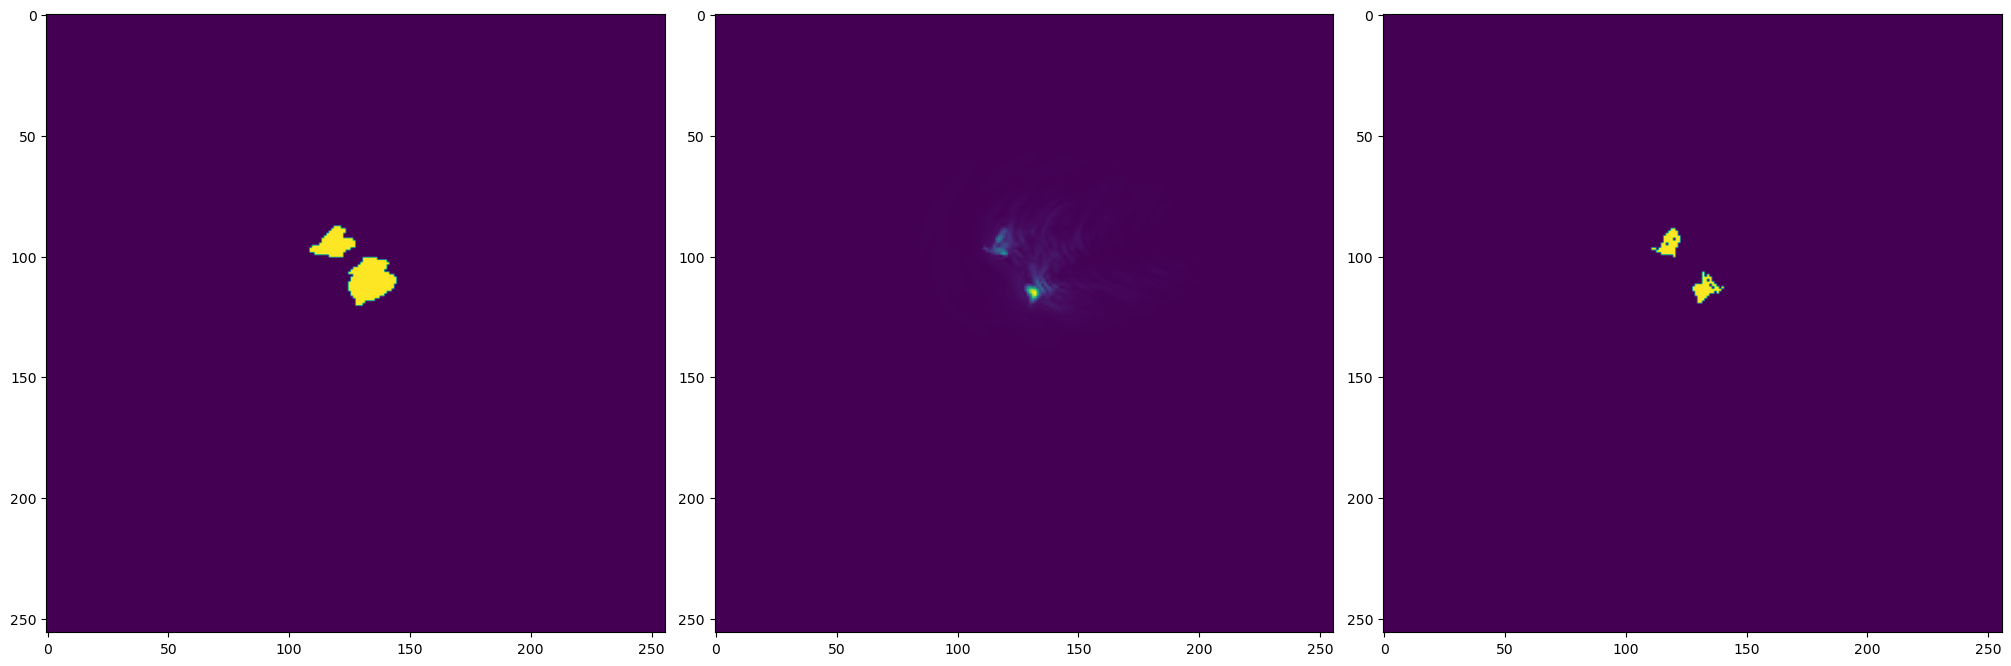

2


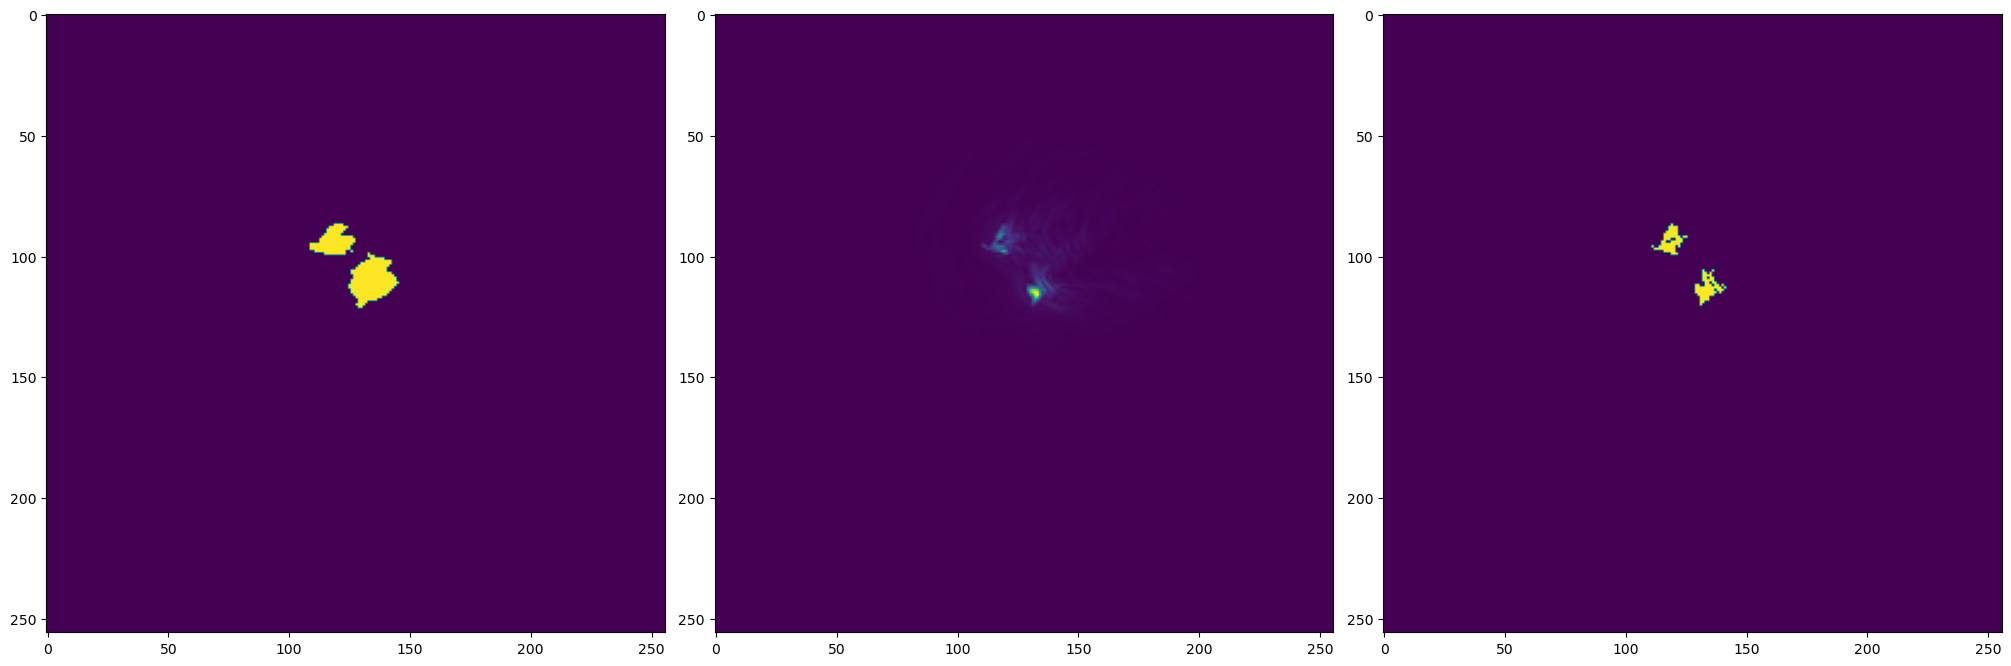

2


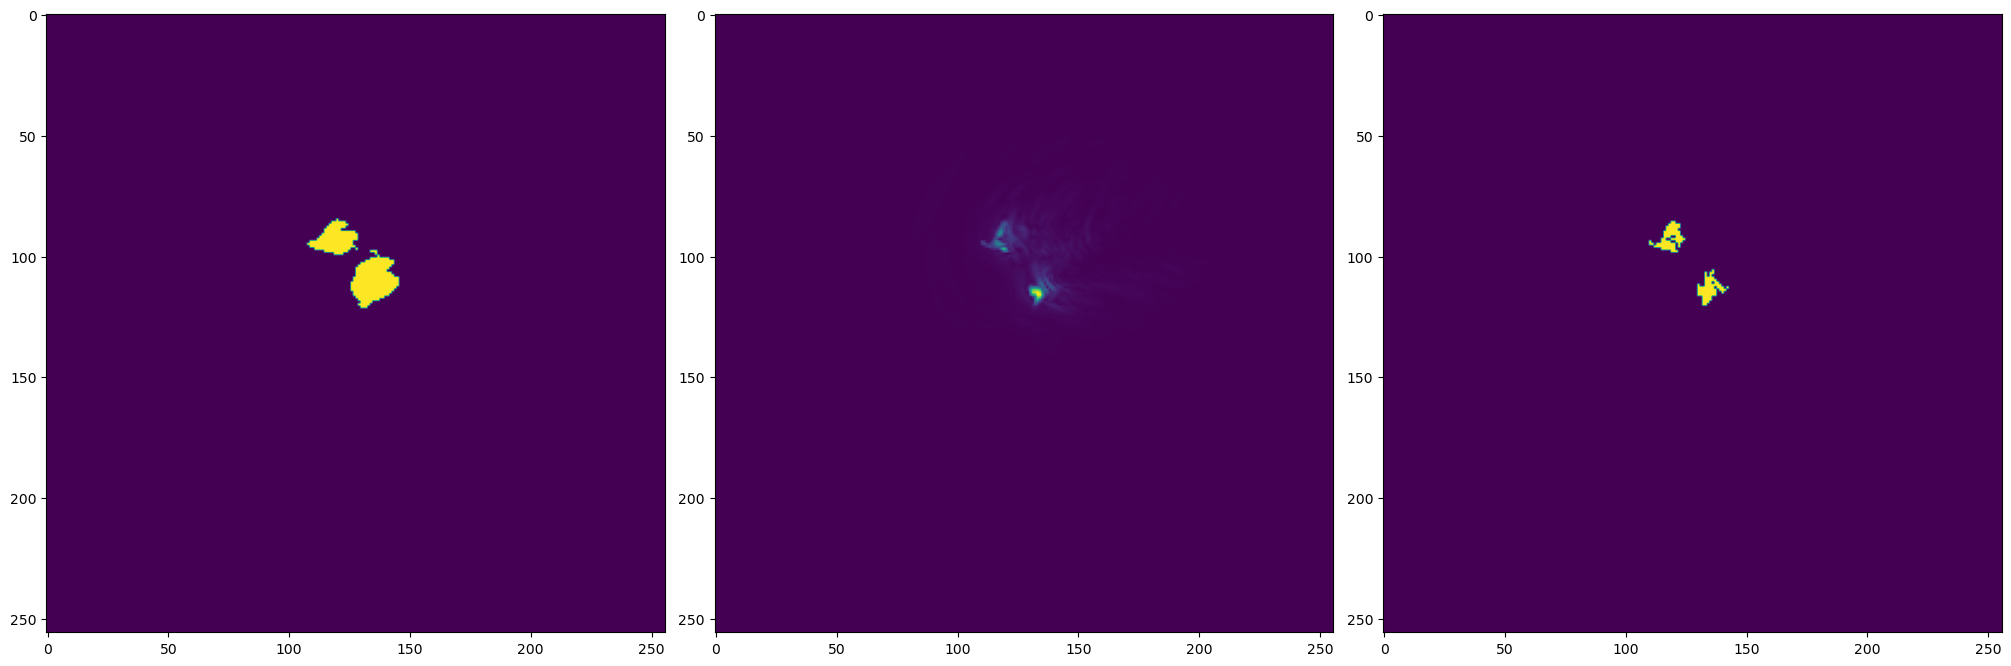

2


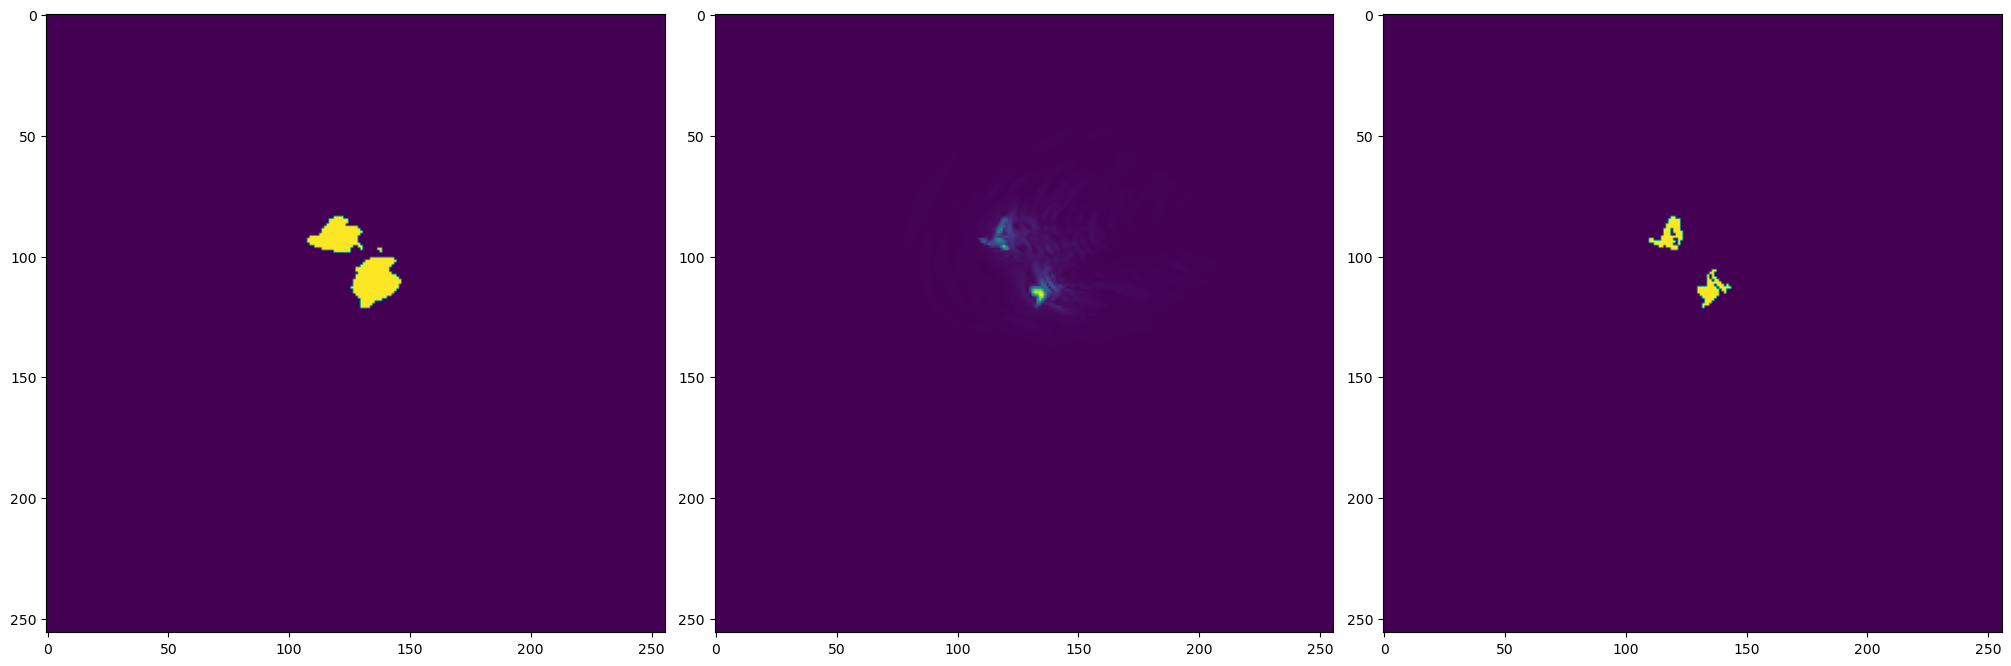

2


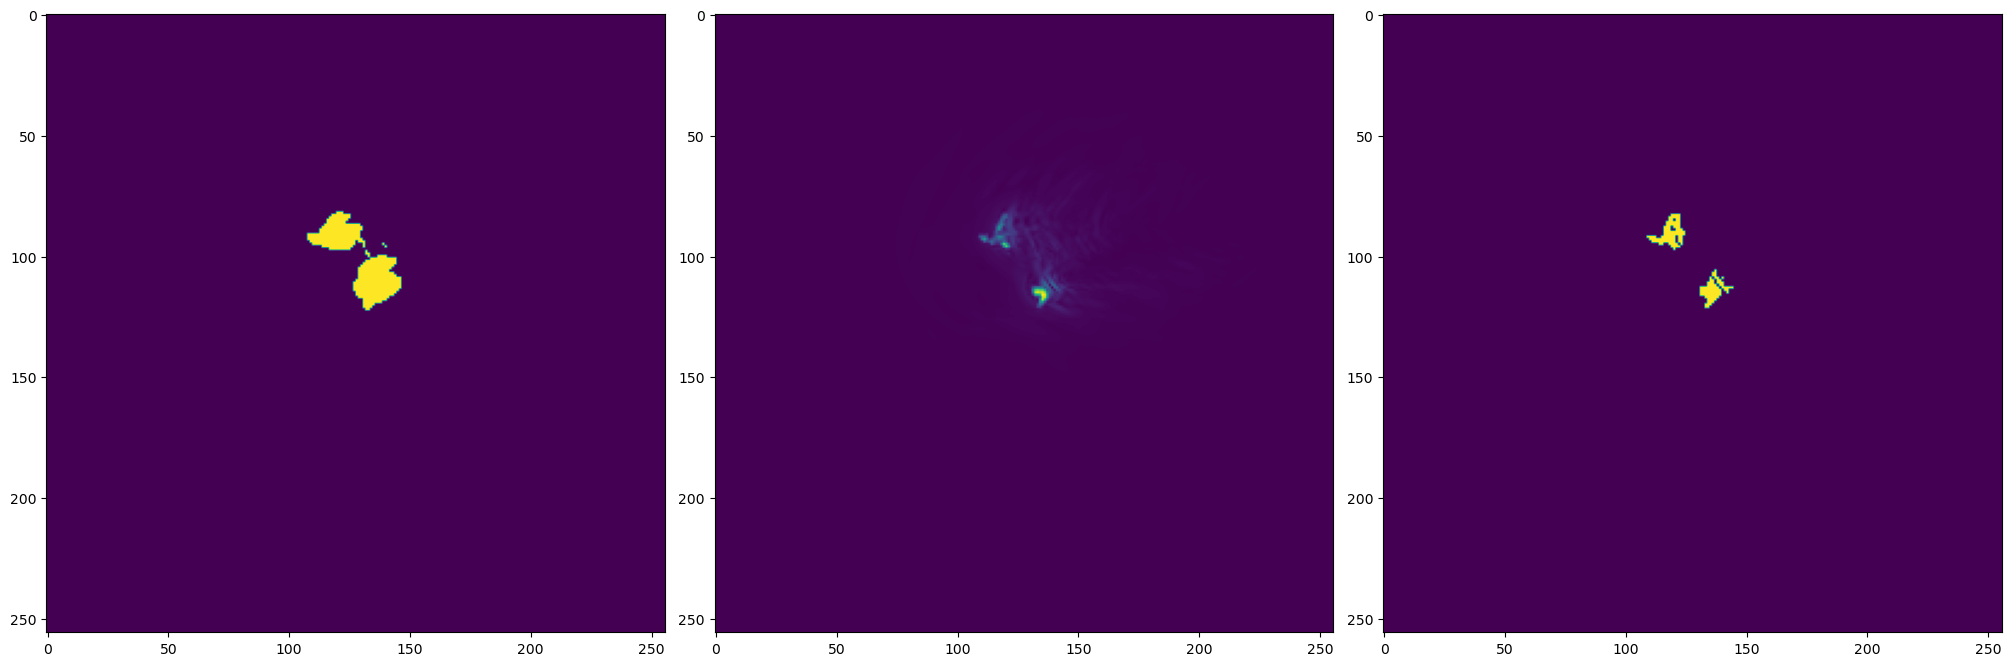

3


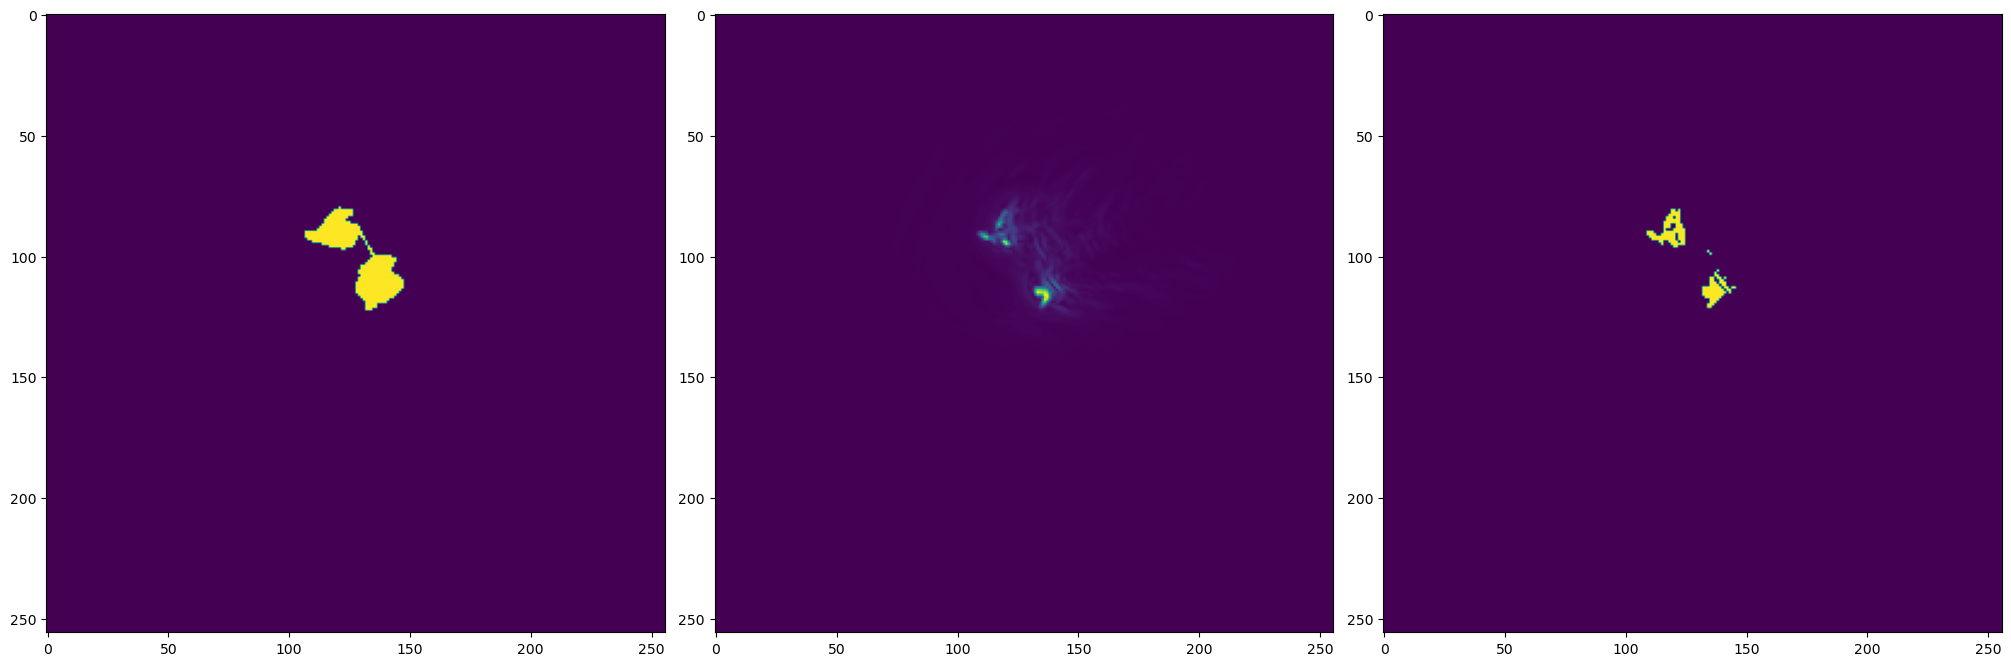

4


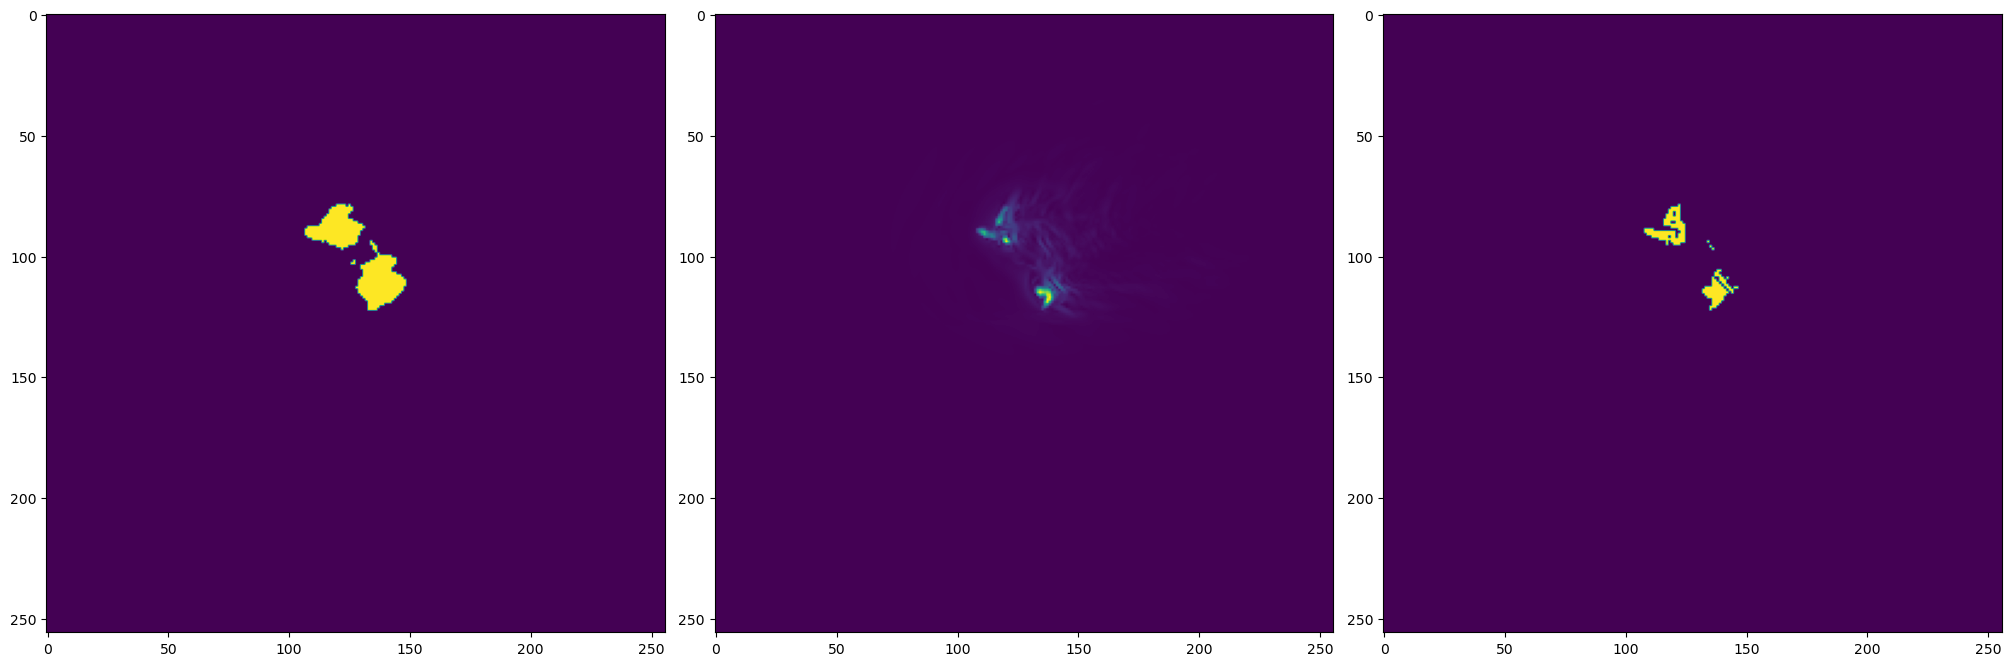

In [10]:
path = "/work/wicker/Odin_scr/cm1r20.3/run/supercell_3km_qv16"
ds = tools.CM1_tools.read_cm1_fields(path, file_pattern=None, vars=['pres', 'w',], ret_dbz=True)

# path = "/work/wicker/WRF/WRF/test/em_quarter_ss/supercell_3km_qv16/wrfout_d01_0001-01-01_00:00:00"
# ds = tools.WRF_tools.read_wrf_fields(path, file_pattern=None, vars=['pres', 'w',], ret_dbz=True)

cref_thresh = 35.
w_thresh = 5.
min_pix = 3

from skimage.measure import label

mask_cref   = np.where(ds['dbz'].max(axis=1) > cref_thresh, True, False)
mask_w_3d   = np.where(ds['pres'] < 70000.0, ds['w'], np.nan)

mask_w_2d   = np.nanmax(mask_w_3d, axis=1)
mask_w_cref = (mask_w_2d > w_thresh) & mask_cref
f_mask      = mask_w_cref.astype(np.int8)

for n in np.arange(10,ds['w'].shape[0]):    
    label_array, num_obj = label(f_mask[n], background=0, connectivity=2, return_num = True)
    
    print(num_obj)
    
    fig, ax = plt.subplots(1,3, constrained_layout=True,figsize=(20,10))
    
    ax[0].imshow(mask_cref[n][::-1,:])
    ax[1].imshow(mask_w_2d[n][::-1,:])
    ax[2].imshow(f_mask[n][::-1,:])
    plt.show()


In [19]:
w = pickle2Obj('cm1_supercell_3km_profiles.pkl', retObj=False)

In [20]:
pert_t = w["qv14"]['pert_p']
print(pert_t.shape)

(100, 10)


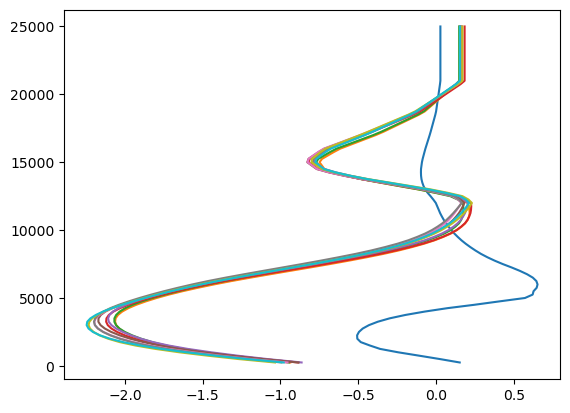

In [21]:
zhgts = 250. + 250.*np.arange(100)
plt.plot(pert_t/100., zhgts)
plt.show()